<div class="alert alert-block alert-success">
    
# Practical Application II 
**Required Assignment 11.1: What Drives the Price of a Car?**
  

</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#What-drives-the-price-of-a-car" data-toc-modified-id="What-drives-the-price-of-a-car">1.&nbsp;What drives the price of a car?</a></span>
<ul class="toc-item">
<li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1.1">1.1&nbsp;Import Modules</a></span></li>
<li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2">1.2&nbsp;Import Data</a></span></li>
<li><span><a href="#Data-Quality" data-toc-modified-id="Data-Quality-1.3">1.3&nbsp;Data Quality</a></span></li>
<li><span><a href="#Data-Handling" data-toc-modified-id="Data-Handling-1.4">1.4&nbsp;Data Handling</a></span></li>
<li><span><a href="#EDA-and-Data-Check" data-toc-modified-id="EDA-and-Data-Check-1.5">1.5&nbsp;EDA and Data Check</a></span></li>
<li><span><a href="#Outlier-Treatment" data-toc-modified-id="Outlier-Treatment-1.6">1.6&nbsp;Outlier Treatment</a></span></li>
<li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-1.7">1.7&nbsp;Bivariate Analysis</a></span></li>
<li><span><a href="#Numerical-Value-relationship" data-toc-modified-id="Numerical-Value-Relationship-1.8">1.8&nbsp;Numerical Value Relationship</a></span></li>
<li><span><a href="#Categorical-Value-relationship" data-toc-modified-id="Categorical-Value-Relationship-1.9">1.9&nbsp;Categorical Value Relationship</a></span></li>
<li><span><a href="#Numerical-Data-Prep" data-toc-modified-id="Numerical-Data-Prep-1.10">1.10&nbsp;Numerical Data Prep</a></span></li>
<li><span><a href="#Numerical-Model-Fitting" data-toc-modified-id="Numerical-Model-Fitting-1.11">1.11&nbsp;Numerical Model Fitting</a></span></li>
<li><span><a href="#Numerical-and-Categorical-Data-Prep" data-toc-modified-id="Numerical-and-Categorical-Data-Prep-1.12">1.12&nbsp;Numerical and Categorical Data Prep</a></span></li>
<li><span><a href="#Numerical-and-Categorical-Model-Fitting" data-toc-modified-id="Numerical-and-Categorical-Model-Fitting-1.13">1.13&nbsp;Numerical and Categorical Model Fitting</a></span></li>
<li><span><a href="#Model-with-all-columns-Ordinal-Encoding" data-toc-modified-id="Model-with-all-columns-Ordinal-Encoding-1.14">1.14&nbsp;Model with All Columns - Ordinal Encoding</a></span></li>
<li><span><a href="#With-Cross-Validation-and-Optimal-Alpha-for-Ridge-and-Lasso" data-toc-modified-id="With-Cross-Validation-and-Optimal-Alpha-for-Ridge-and-Lasso-1.15">1.15&nbsp;With Cross-Validation and Optimal Alpha for Ridge and Lasso</a></span></li>
</ul>
</li>
</ul>
</div>

# What Drives the Price of a Car?

What is the best feature to predict the price of a car?

## Import Modules

In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
# prepare data
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve,cross_val_score

from sklearn import set_config
set_config(transform_output="pandas") # get the output in pandas df

from sklearn.impute import SimpleImputer

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression, RidgeCV, LassoCV

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold

import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

## Import Data

In [118]:
df = pd.read_csv("data/vehicles.csv")

In [119]:
orig_df = df.copy()

In [120]:
df.head(5)

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

## Data Quality

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [125]:
df.shape

(426880, 18)

In [126]:
df.sample(10)

id                    region  price    year manufacturer  \
255670  7310982088              north jersey  16500  2001.0         ford   
286459  7316166086            akron / canton  13685  2014.0        acura   
167168  7312415937                  lawrence   5100  2013.0         ford   
154075  7309351149         muncie / anderson  36990  2018.0          bmw   
223144  7302328254               springfield  24800  1997.0         ford   
78398   7316835950   fort collins / north CO   9600  1999.0         ford   
403710  7311300264  kennewick-pasco-richland   7490  2012.0         ford   
393629  7313261448   norfolk / hampton roads  30977  2017.0    chevrolet   
218069  7304177915                  st cloud  25990  2019.0          gmc   
330733  7306306164                 lancaster   7995  2002.0         ford   

                             model  condition    cylinders    fuel  odometer  \
255670                        f350  excellent          NaN  diesel   64000.0   
286459                          tl        NaN  6 cylinders     gas   86829.0   
167168                      fiesta       good  4 cylinders     gas   86000.0   
154075        4 series 430i xdrive       good          NaN     gas   42913.0   
223144                   f-250 xlt  excellent          NaN     gas   60922.0   
78398                         f250       good  8 cylinders  diesel  253000.0   
403710                        edge       good          NaN     gas  138616.0   
393629        express 3500 15 pass   like new  8 cylinders     gas   11160.0   
218069  acadia slt-2 sport utility       good  6 cylinders     gas   70640.0   
330733                 f250 lariat        NaN  8 cylinders     gas  119000.0   

       title_status transmission                VIN drive       size  \
255670        clean    automatic                NaN   NaN  full-size   
286459        clean    automatic  19UUA8F52EA007681   fwd        NaN   
167168        clean    automatic                NaN   fwd   mid-size   
154075        clean        other  WBA4Z3C59JEC57372   NaN        NaN   
223144        clean    automatic                NaN   4wd        NaN   
78398         clean    automatic                NaN   4wd  full-size   
403710        clean    automatic                NaN   NaN        NaN   
393629        clean    automatic  1GAZGNFF7H1332298   rwd  full-size   
218069        clean        other  1GKKNNLS8KZ159484   fwd        NaN   
330733        clean    automatic                NaN   4wd        NaN   

               type paint_color state  
255670       pickup         red    nj  
286459        sedan       black    oh  
167168        sedan        blue    ks  
154075  convertible       white    in  
223144          NaN         NaN    mo  
78398         truck       green    co  
403710          NaN         NaN    wa  
393629          van       white    va  
218069          SUV       white    mn  
330733          NaN         NaN    pa

In [132]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [134]:
# Check for duplicates
sum(df.duplicated())

0

In [135]:
#Check for missing values
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [138]:
#Check for missing values
df.isna().mean().round(4)*100

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64

In [140]:
df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

## Data Handling

In [142]:
#convert cylinders data type to float and replace data
df['cylinders_numeric'] = pd.to_numeric(
    df['cylinders'].str.extract(r'(\d+)')[0], errors='coerce'
)

In [143]:
#drop rows having NULL values less than 5%
cleaned_df1 = df.dropna(subset=['price', 'year', 'manufacturer', 'odometer','model','title_status','transmission','fuel'])

In [146]:
cleaned_df1.shape # 37,276 rows are dropped due to missing data

(389604, 19)

In [148]:
#convert data type of year column to int
cleaned_df1['year'] = cleaned_df1['year'].astype('int64')

C:\Users\shikh\AppData\Local\Temp\ipykernel_5648\3936534093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['year'] = cleaned_df1['year'].astype('int64')


In [150]:
cleaned_df1[cleaned_df1["price"] == 0] #price is 0 for 28,576 rows

id      region  price  year manufacturer              model  \
46      7315039307      auburn      0  2011         jeep            compass   
126     7305672709      auburn      0  2018    chevrolet  express cargo van   
127     7305672266      auburn      0  2019    chevrolet  express cargo van   
128     7305672252      auburn      0  2018    chevrolet  express cargo van   
191     7316755272  birmingham      0  2015       nissan             sentra   
...            ...         ...    ...   ...          ...                ...   
426763  7303399788     wyoming      0  2009       toyota              prius   
426812  7302877815     wyoming      0  2006       toyota           scion tc   
426832  7302353283     wyoming      0  2004       toyota              prius   
426836  7302301268     wyoming      0  2018          ram               2500   
426868  7301843288     wyoming      0  2010       toyota              venza   

        condition    cylinders    fuel  odometer title_status transmission  \
46      excellent          NaN     gas   99615.0        clean    automatic   
126      like new  6 cylinders     gas   68472.0        clean    automatic   
127      like new  6 cylinders     gas   69125.0        clean    automatic   
128      like new  6 cylinders     gas   66555.0        clean    automatic   
191     excellent  4 cylinders     gas   99505.0        clean    automatic   
...           ...          ...     ...       ...          ...          ...   
426763  excellent  4 cylinders  hybrid  271000.0        clean    automatic   
426812  excellent  4 cylinders     gas  195000.0        clean    automatic   
426832  excellent  4 cylinders  hybrid  239000.0        clean    automatic   
426836  excellent  6 cylinders  diesel   20492.0        clean    automatic   
426868  excellent  6 cylinders     gas  155000.0        clean    automatic   

                      VIN drive       size   type paint_color state  \
46                    NaN   NaN  full-size    SUV         NaN    al   
126     1GCWGAFP8J1309579   rwd  full-size    van       white    al   
127     1GCWGAFP4K1214373   rwd  full-size    van       white    al   
128     1GCWGAFPXJ1337903   rwd  full-size    van       white    al   
191     3N1AB7AP8FY348505   fwd        NaN  sedan      silver    al   
...                   ...   ...        ...    ...         ...   ...   
426763  JTDKB20U993526186   fwd        NaN    NaN       white    wy   
426812  JTKDE177460109655   fwd        NaN    NaN      silver    wy   
426832  JTDKB20U840108051   fwd        NaN    NaN        blue    wy   
426836  3C6UR5HL3JG307217   4wd  full-size  truck       white    wy   
426868  4T3BK3BB0AU043625   4wd        NaN    NaN        blue    wy   

        cylinders_numeric  
46                    NaN  
126                   6.0  
127                   6.0  
128                   6.0  
191                   4.0  
...                   ...  
426763                4.0  
426812                4.0  
426832                4.0  
426836                6.0  
426868                6.0  

[28576 rows x 19 columns]

In [152]:
# drop rows having price =0
cleaned_df2 = cleaned_df1[cleaned_df1['price'] != 0] # 28,576 rows are dropped because price was 0

In [154]:
cleaned_df2.shape

(361028, 19)

In [156]:
#drop id, VIN and region columns

cleaned_df3 = cleaned_df2.drop(columns = ["id", "VIN", "region","cylinders"])

In [158]:
cleaned_df3.shape

(361028, 15)

In [160]:
cleaned_df3.duplicated().sum()

#105,203 records are duplicate after dropping id, VIN and region column

105203

In [162]:
cleaned_df4 = cleaned_df3.drop_duplicates()

# 105,203 records are dropped

In [164]:
cleaned_df4.shape

(255825, 15)

In [166]:
cleaned_df4.isna().mean().round(4)*100

price                 0.00
year                  0.00
manufacturer          0.00
model                 0.00
condition            35.66
fuel                  0.00
odometer              0.00
title_status          0.00
transmission          0.00
drive                28.31
size                 67.41
type                 22.56
paint_color          27.13
state                 0.00
cylinders_numeric    37.93
dtype: float64

In [168]:
cleaned_df = cleaned_df4.copy()

In [170]:
cleaned_df.shape

(255825, 15)

In [172]:
cleaned_df.describe()

price           year      odometer  cylinders_numeric
count  2.558250e+05  255825.000000  2.558250e+05      158789.000000
mean   8.833639e+04    2010.507370  1.023373e+05           5.914100
std    1.412839e+07       9.620751  1.973307e+05           1.601576
min    1.000000e+00    1900.000000  0.000000e+00           3.000000
25%    6.795000e+03    2007.000000  4.200000e+04           4.000000
50%    1.397700e+04    2013.000000  9.268500e+04           6.000000
75%    2.519500e+04    2017.000000  1.400000e+05           8.000000
max    3.736929e+09    2022.000000  1.000000e+07          12.000000

## EDA and Data Check

### Univariate Analysis of Target Column: `price`

In [174]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [176]:
cleaned_df[['price']].describe()

price
count     255825.00
mean       88336.39
std     14128387.39
min            1.00
25%         6795.00
50%        13977.00
75%        25195.00
max   3736928711.00

In [178]:
p = [0.01, 0.02, 0.05, .85,.95, .99]

In [180]:
cleaned_df[['price']].describe(p)

price
count     255825.00
mean       88336.39
std     14128387.39
min            1.00
1%           252.24
2%           554.00
5%          2000.00
50%        13977.00
85%        31999.00
95%        43850.00
99%        65995.00
max   3736928711.00

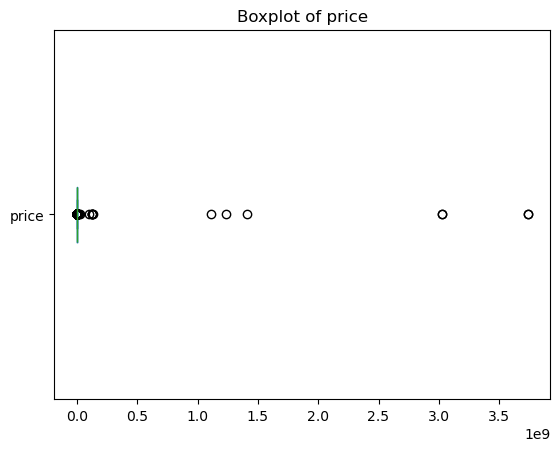

In [182]:
cleaned_df['price'].plot(kind = 'box', vert = False, title = "Boxplot of price");

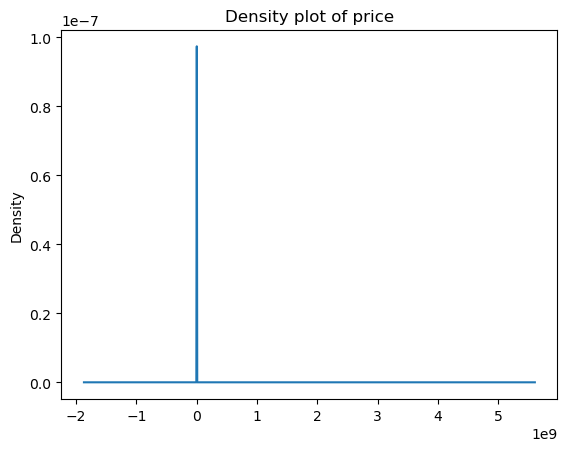

In [45]:
cleaned_df['price'].plot(kind = 'density', title = "Density plot of price");

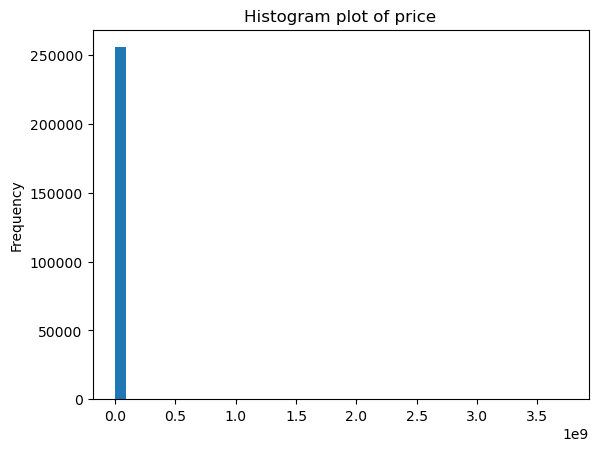

In [46]:
cleaned_df['price'].plot(kind = 'hist', bins = 40, title = "Histogram plot of price");

**Log of Price**

In [48]:
cleaned_df["price_log"] = np.log(cleaned_df['price'])

In [49]:
cleaned_df.head(3)

price  year manufacturer                     model condition fuel  \
27  33590  2014          gmc  sierra 1500 crew cab slt      good  gas   
28  22590  2010    chevrolet            silverado 1500      good  gas   
29  39590  2020    chevrolet       silverado 1500 crew      good  gas   

    odometer title_status transmission drive size    type paint_color state  \
27  57923.00        clean        other   NaN  NaN  pickup       white    al   
28  71229.00        clean        other   NaN  NaN  pickup        blue    al   
29  19160.00        clean        other   NaN  NaN  pickup         red    al   

    cylinders_numeric  price_log  
27               8.00      10.42  
28               8.00      10.03  
29               8.00      10.59

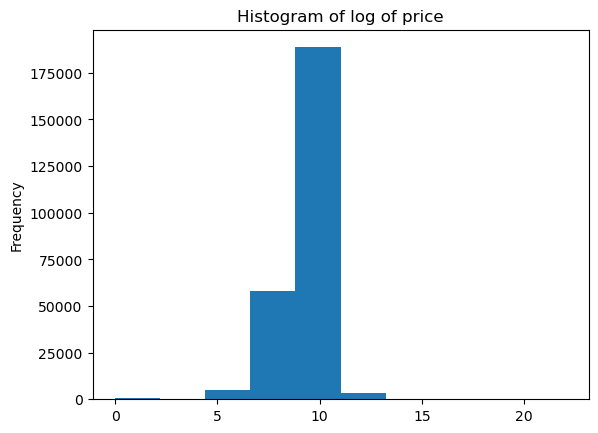

In [50]:
cleaned_df['price_log'].plot(kind = 'hist', title = "Histogram of log of price");

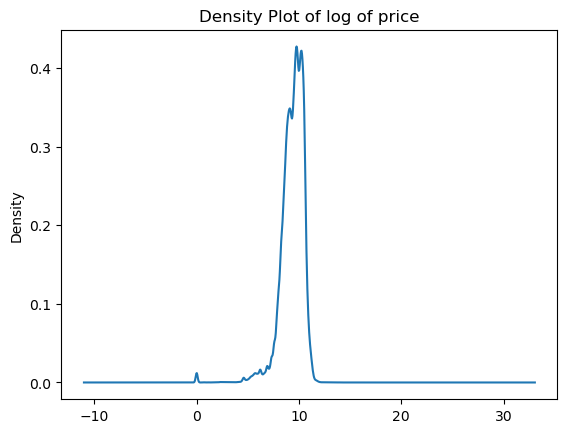

In [51]:
cleaned_df['price_log'].plot(kind = 'kde', title = "Density Plot of log of price");

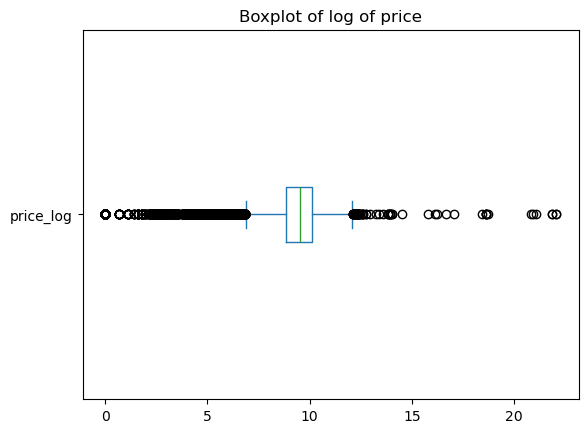

In [52]:
cleaned_df['price_log'].plot(kind = 'box', vert = False, title = "Boxplot of log of price");

## Outlier Treatment

### IQR Treatment for price column

In [184]:
iqr_p = cleaned_df['price'].quantile(.75) - cleaned_df['price'].quantile(.25)
iqr_p

18400.0

In [188]:
lower_bound = cleaned_df['price'].quantile(.25) - 1.5 * iqr_p
upper_bound = cleaned_df['price'].quantile(.75) + 1.5 * iqr_p
lower_bound

-20805.0

In [190]:
df_iqr_p = cleaned_df[(cleaned_df['price'] > lower_bound) & (cleaned_df['price'] < upper_bound)].copy()

In [192]:
iqr_data_lost_p = 1-(df_iqr_p.shape[0]/cleaned_df.shape[0])
print("We lost {:.2%} of the data by the IQR method".format(iqr_data_lost_p))

We lost 2.50% of the data by the IQR method


In [194]:
df_iqr_p['price'].describe()

count   249434.00
mean     16330.07
std      11950.58
min          1.00
25%       6500.00
50%      13476.50
75%      24498.75
max      52778.00
Name: price, dtype: float64

In [196]:
print(cleaned_df.shape)

(255825, 15)


In [198]:
print(df_iqr_p.shape)

(249434, 15)


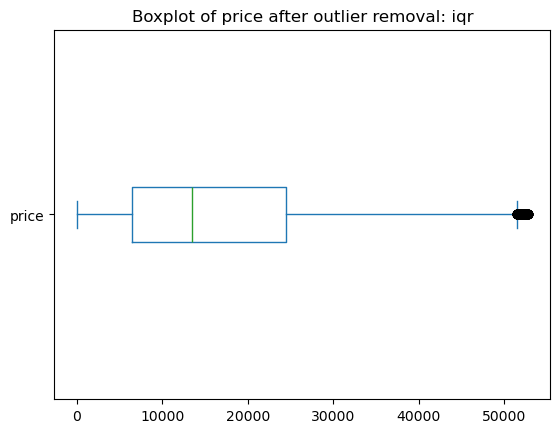

In [200]:
df_iqr_p['price'].plot(kind = 'box', vert = False, title = "Boxplot of price after outlier removal: iqr");

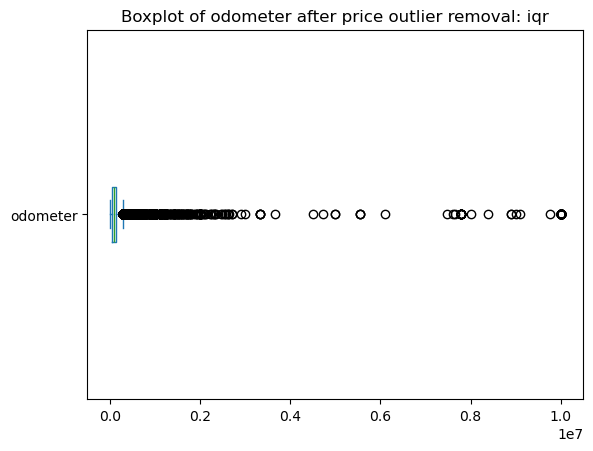

In [63]:
df_iqr_p['odometer'].plot(kind = 'box', vert = False, title = "Boxplot of odometer after price outlier removal: iqr");

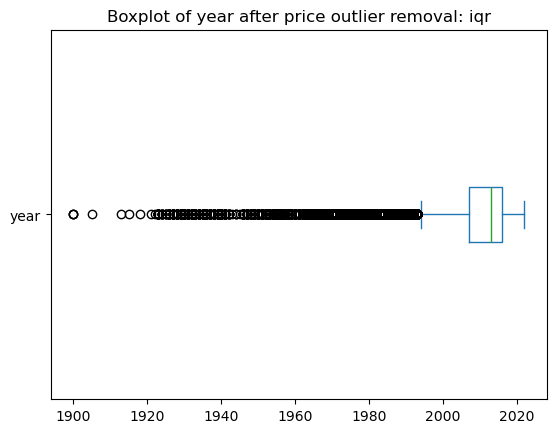

In [64]:
df_iqr_p['year'].plot(kind = 'box', vert = False, title = "Boxplot of year after price outlier removal: iqr");

### IQR Treatment for odometer column

In [202]:
iqr_o = df_iqr_p['odometer'].quantile(.75) - df_iqr_p['odometer'].quantile(.25)
iqr_o

97225.0

In [204]:
lower_bound = df_iqr_p['odometer'].quantile(.25) - 1.5 * iqr_o
upper_bound = df_iqr_p['odometer'].quantile(.75) + 1.5 * iqr_o
lower_bound

-101714.5

In [206]:
df_iqr_o = df_iqr_p[(df_iqr_p['odometer'] > lower_bound) & (df_iqr_p['odometer'] < upper_bound)].copy()

In [208]:
iqr_data_lost_o = 1-(df_iqr_o.shape[0]/df_iqr_p.shape[0])
print("We lost {:.2%} of the data by the IQR method".format(iqr_data_lost_o))

We lost 0.87% of the data by the IQR method


In [210]:
df_iqr_o['odometer'].describe()

count   247263.00
mean     96942.18
std      61664.57
min          0.00
25%      43746.50
50%      93967.00
75%     140000.00
max     287163.00
Name: odometer, dtype: float64

In [212]:
print(df_iqr_p.shape)

(249434, 15)


In [214]:
print(df_iqr_o.shape)

(247263, 15)


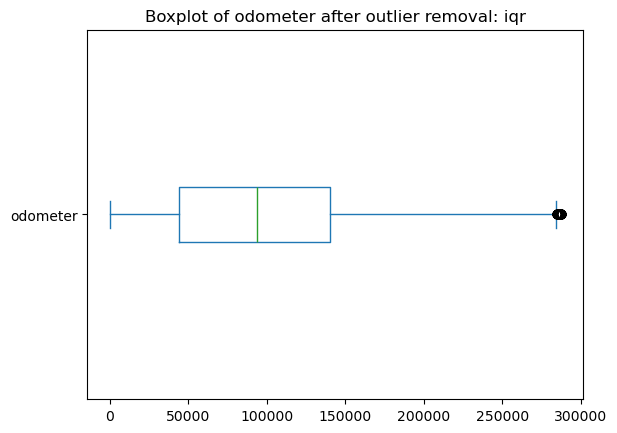

In [216]:
df_iqr_o['odometer'].plot(kind = 'box', vert = False, title = "Boxplot of odometer after outlier removal: iqr");

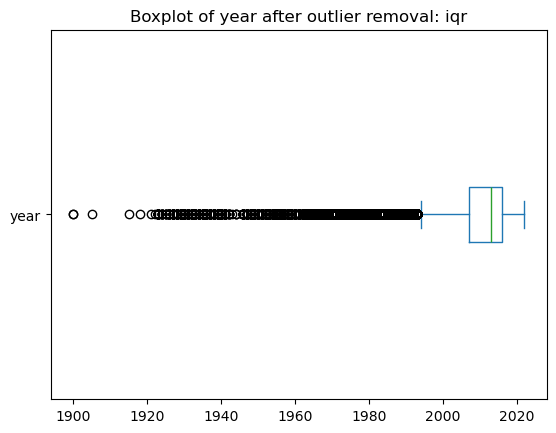

In [218]:
df_iqr_o['year'].plot(kind = 'box', vert = False, title = "Boxplot of year after outlier removal: iqr");

### IQR Treatment for year column

In [220]:
iqr_y = df_iqr_o['year'].quantile(.75) - df_iqr_o['year'].quantile(.25)
iqr_y

9.0

In [222]:
lower_bound = df_iqr_o['year'].quantile(.25) - 1.5 * iqr_y
upper_bound = df_iqr_o['year'].quantile(.75) + 1.5 * iqr_y
lower_bound

1993.5

In [224]:
df_iqr_y = df_iqr_o[(df_iqr_o['year'] > lower_bound) & (df_iqr_o['year'] < upper_bound)].copy()

In [226]:
iqr_data_lost_y = 1-(df_iqr_y.shape[0]/df_iqr_o.shape[0])
print("We lost {:.2%} of the data by the IQR method".format(iqr_data_lost_y))

We lost 3.92% of the data by the IQR method


In [228]:
df_iqr_y['year'].describe()

count   237575.00
mean      2011.88
std          5.71
min       1994.00
25%       2008.00
50%       2013.00
75%       2017.00
max       2022.00
Name: year, dtype: float64

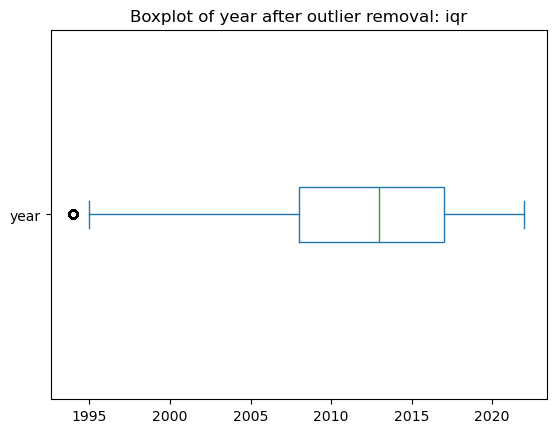

In [230]:
df_iqr_y['year'].plot(kind = 'box', vert = False, title = "Boxplot of year after outlier removal: iqr");

In [232]:
df_iqr_y.shape

(237575, 15)

In [234]:
df_iqr=df_iqr_y.copy()

In [236]:
df_iqr.shape

(237575, 15)

In [238]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237575 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              237575 non-null  int64  
 1   year               237575 non-null  int64  
 2   manufacturer       237575 non-null  object 
 3   model              237575 non-null  object 
 4   condition          153387 non-null  object 
 5   fuel               237575 non-null  object 
 6   odometer           237575 non-null  float64
 7   title_status       237575 non-null  object 
 8   transmission       237575 non-null  object 
 9   drive              170476 non-null  object 
 10  size               76944 non-null   object 
 11  type               185884 non-null  object 
 12  paint_color        173953 non-null  object 
 13  state              237575 non-null  object 
 14  cylinders_numeric  147347 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 29.0+

In [240]:
df_iqr.describe()

price      year  odometer  cylinders_numeric
count 237575.00 237575.00 237575.00          147347.00
mean   16552.04   2011.88  97541.22               5.83
std    11980.82      5.71  61579.25               1.58
min        1.00   1994.00      0.00               3.00
25%     6800.00   2008.00  44100.00               4.00
50%    13888.00   2013.00  94648.00               6.00
75%    24900.00   2017.00 140653.50               8.00
max    52778.00   2022.00 287163.00              12.00

In [242]:
df_iqr.isna().mean().round(4)*100

price                0.00
year                 0.00
manufacturer         0.00
model                0.00
condition           35.44
fuel                 0.00
odometer             0.00
title_status         0.00
transmission         0.00
drive               28.24
size                67.61
type                21.76
paint_color         26.78
state                0.00
cylinders_numeric   37.98
dtype: float64

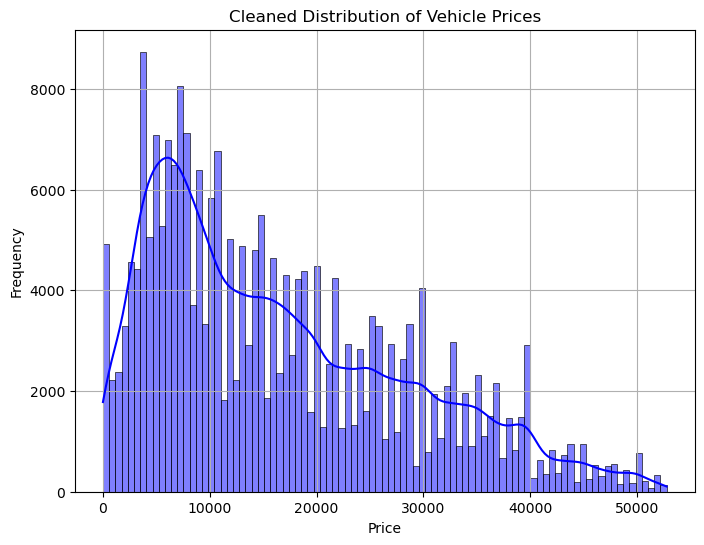

In [244]:
plt.figure(figsize=(8, 6))
sns.histplot(df_iqr['price'], kde=True, color="blue")
plt.title("Cleaned Distribution of Vehicle Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [89]:
#drop id, VIN and region columns

df_iqr = df_iqr.drop(columns = ["price_log"])

In [90]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237575 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              237575 non-null  int64  
 1   year               237575 non-null  int64  
 2   manufacturer       237575 non-null  object 
 3   model              237575 non-null  object 
 4   condition          153387 non-null  object 
 5   fuel               237575 non-null  object 
 6   odometer           237575 non-null  float64
 7   title_status       237575 non-null  object 
 8   transmission       237575 non-null  object 
 9   drive              170476 non-null  object 
 10  size               76944 non-null   object 
 11  type               185884 non-null  object 
 12  paint_color        173953 non-null  object 
 13  state              237575 non-null  object 
 14  cylinders_numeric  147347 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 29.0+

## Bivariate Analysis

### Numerical Value relationship

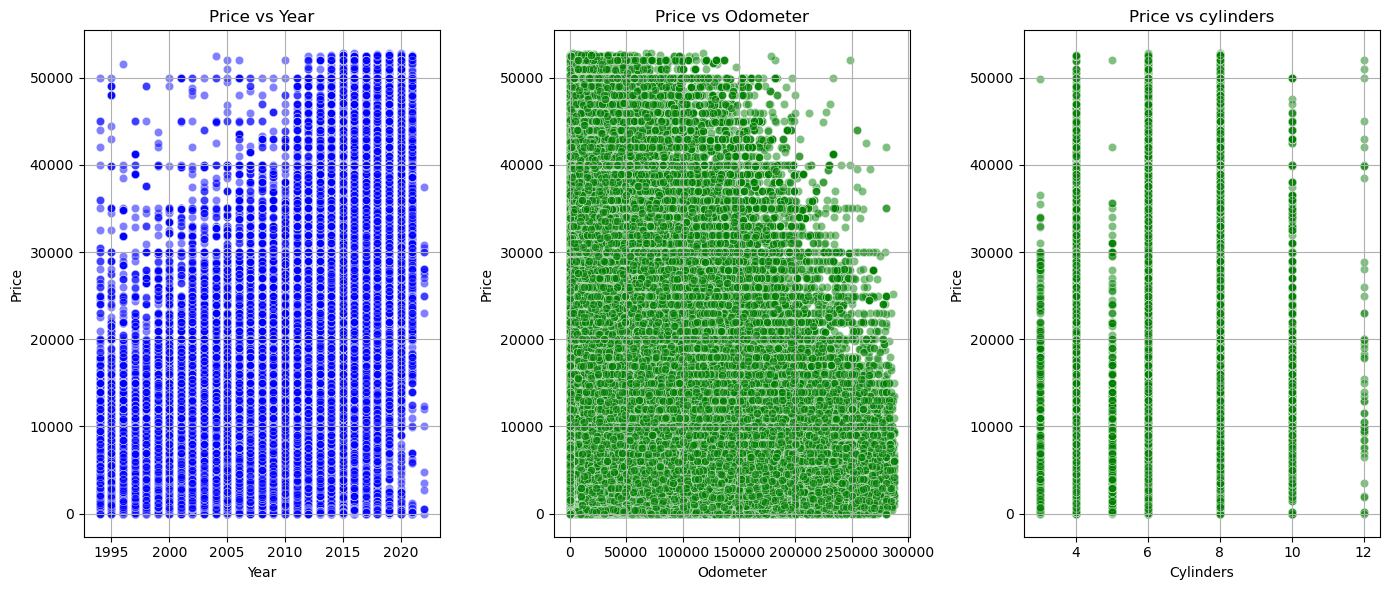

In [93]:
# Price vs Year and Odometer Scatterplots to observe trends
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Price vs Year
sns.scatterplot(x='year', y='price', data=df_iqr, alpha=0.5, ax=axes[0], color='blue')
axes[0].set_title('Price vs Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')
axes[0].grid()

# Price vs Odometer
sns.scatterplot(x='odometer', y='price', data=df_iqr, alpha=0.5, ax=axes[1], color='green')
axes[1].set_title('Price vs Odometer')
axes[1].set_xlabel('Odometer')
axes[1].set_ylabel('Price')
axes[1].grid()

# Price vs Odometer
sns.scatterplot(x='cylinders_numeric', y='price', data=df_iqr, alpha=0.5, ax=axes[2], color='green')
axes[2].set_title('Price vs cylinders')
axes[2].set_xlabel('Cylinders')
axes[2].set_ylabel('Price')
axes[2].grid()

plt.tight_layout()
plt.show()

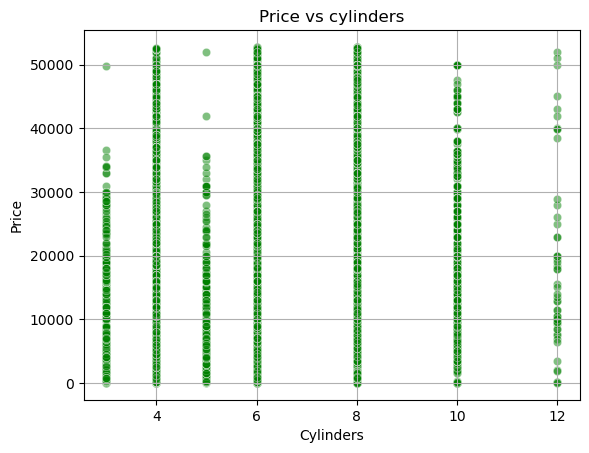

In [94]:
sns.scatterplot(x='cylinders_numeric', y='price', data=df_iqr, alpha=0.5, color='green')
plt.title('Price vs cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.grid()

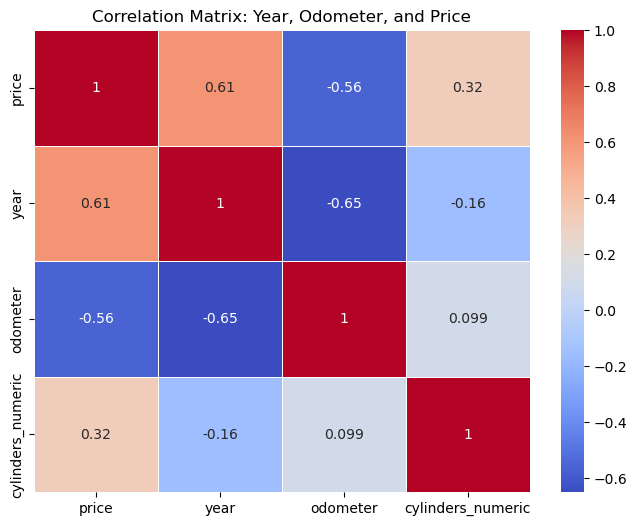

In [95]:
# Correlation Analysis: Odometer, Year, and Price

corr = df_iqr.corr(numeric_only = True)
#sns.heatmap(corr, annot = True);
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Year, Odometer, and Price")
plt.show()

### Categorical Value relationship

In [97]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237575 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              237575 non-null  int64  
 1   year               237575 non-null  int64  
 2   manufacturer       237575 non-null  object 
 3   model              237575 non-null  object 
 4   condition          153387 non-null  object 
 5   fuel               237575 non-null  object 
 6   odometer           237575 non-null  float64
 7   title_status       237575 non-null  object 
 8   transmission       237575 non-null  object 
 9   drive              170476 non-null  object 
 10  size               76944 non-null   object 
 11  type               185884 non-null  object 
 12  paint_color        173953 non-null  object 
 13  state              237575 non-null  object 
 14  cylinders_numeric  147347 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 29.0+

**Relationship with `transmission`**

In [99]:
df_iqr['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [100]:
df_iqr['transmission'].nunique()

3

In [101]:
df_iqr.groupby('transmission')['price'].describe()

count     mean      std  min      25%      50%      75%  \
transmission                                                               
automatic    192485.00 14888.05 11428.78 1.00  6000.00 11725.00 20990.00   
manual        12250.00 12499.99 10361.92 1.00  4900.00  8995.00 17500.00   
other         32840.00 27816.64  9139.93 1.00 20990.00 27990.00 34590.00   

                  max  
transmission           
automatic    52778.00  
manual       52595.00  
other        52590.00

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\953769513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df_iqr, palette="Set2")


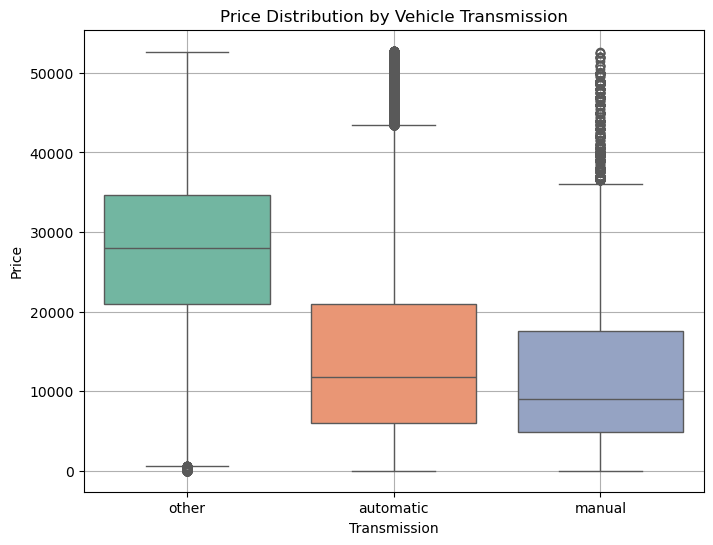

In [102]:
# Boxplot for Price by Transmission
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle Transmission")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.grid()
plt.show()


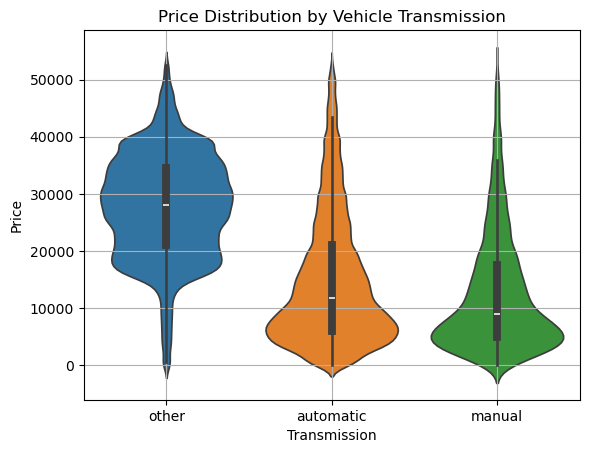

In [103]:
sns.violinplot(x = 'transmission', y = 'price', data = df_iqr, hue = "transmission");
plt.title("Price Distribution by Vehicle Transmission")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.grid()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\1696459696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_transmission.values, y=avg_price_transmission.index, palette="coolwarm")


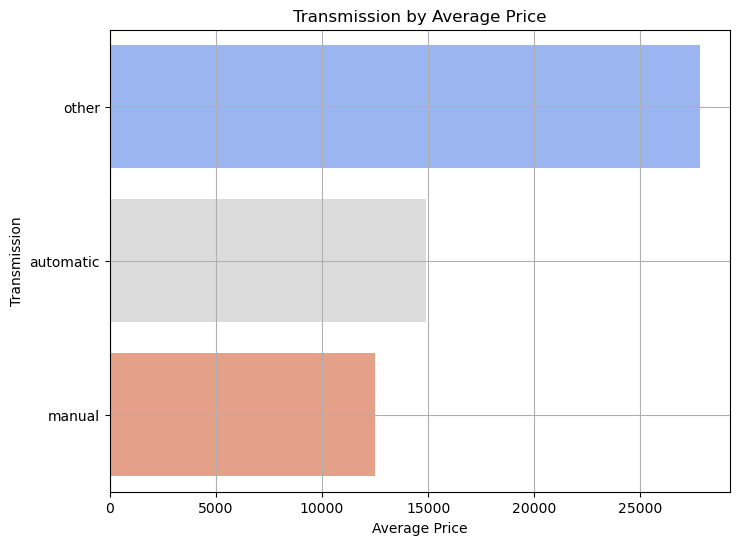

In [104]:
# Average Price by Transmission
avg_price_transmission = df_iqr.groupby('transmission')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_transmission.values, y=avg_price_transmission.index, palette="coolwarm")
plt.title("Transmission by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Transmission")
plt.grid()
plt.show()

**Relationship with `paint_color`**

In [106]:
df_iqr['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [107]:
df_iqr['paint_color'].nunique()

12

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\2951955572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='paint_color', y='price', data=df_iqr, palette="Set2")


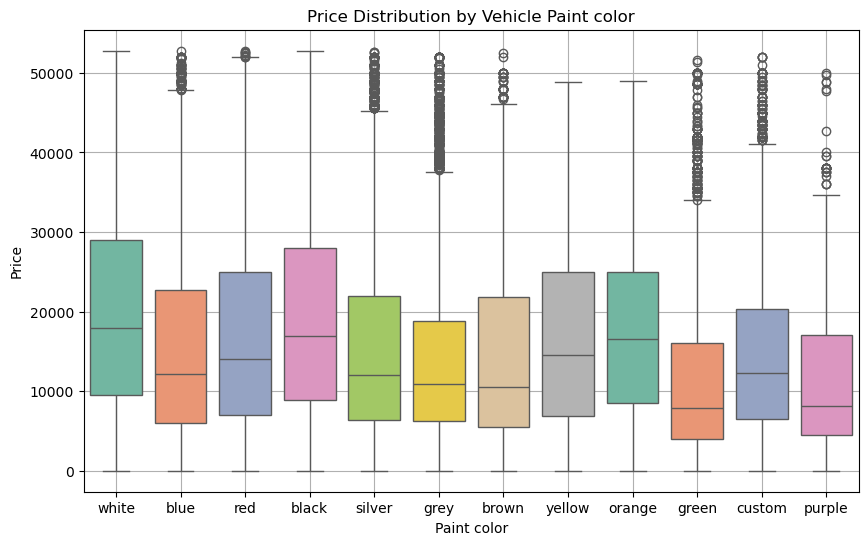

In [108]:
# Boxplot for Price by Paint color
plt.figure(figsize=(10, 6))
sns.boxplot(x='paint_color', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle Paint color")
plt.xlabel("Paint color")
plt.ylabel("Price")
plt.grid()
plt.show()


C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\3154538938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_paint_color.values, y=avg_price_paint_color.index, palette="coolwarm")


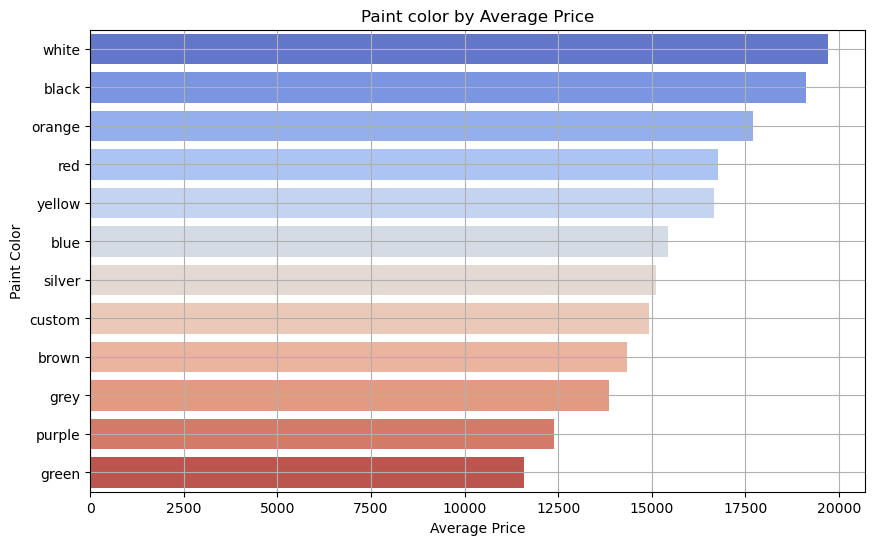

In [109]:
# Average Price by Manufacturer
avg_price_paint_color = df_iqr.groupby('paint_color')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_paint_color.values, y=avg_price_paint_color.index, palette="coolwarm")
plt.title("Paint color by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Paint Color")
plt.grid()
plt.show()

**Relationship with `manufacturer`**

In [111]:
df_iqr['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'mini', 'pontiac', 'fiat', 'rover',
       'tesla', 'saturn', 'mercury', 'harley-davidson', 'aston-martin',
       'land rover', 'ferrari'], dtype=object)

In [112]:
df_iqr['manufacturer'].nunique()

40

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\594529798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_manufacturer.values, y=avg_price_manufacturer.index, palette="coolwarm")


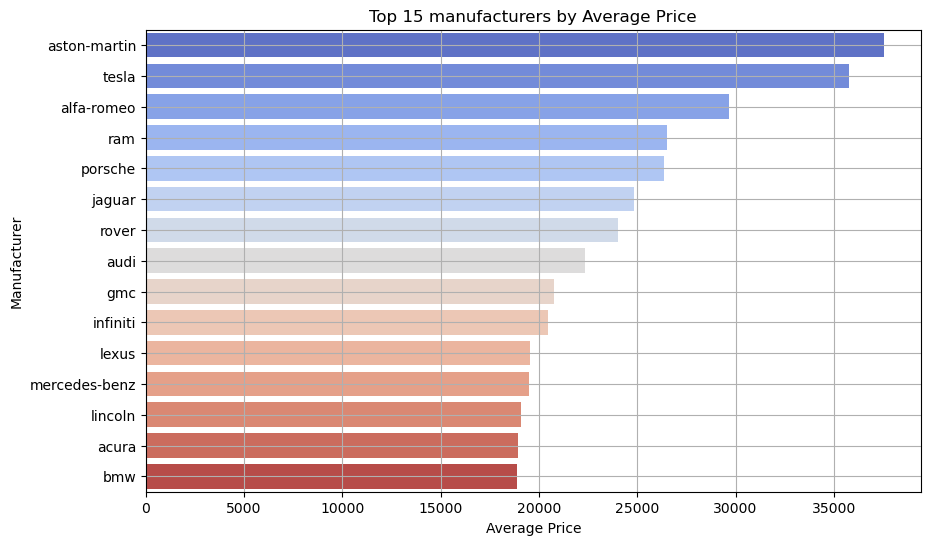

In [113]:
# Average Price by Manufacturer
avg_price_manufacturer = df_iqr.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_manufacturer.values, y=avg_price_manufacturer.index, palette="coolwarm")
plt.title("Top 15 manufacturers by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Manufacturer")
plt.grid()
plt.show()

**Relationship with `model`**

In [115]:
df_iqr['model'].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., 'f150, platinum', 'cruze, 2lt',
       '1500 z71'], dtype=object)

In [116]:
df_iqr['model'].nunique()

18191

In [117]:
#df_iqr.groupby('model')['price'].describe()

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\1049004361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_model.values, y=avg_price_model.index, palette="coolwarm")


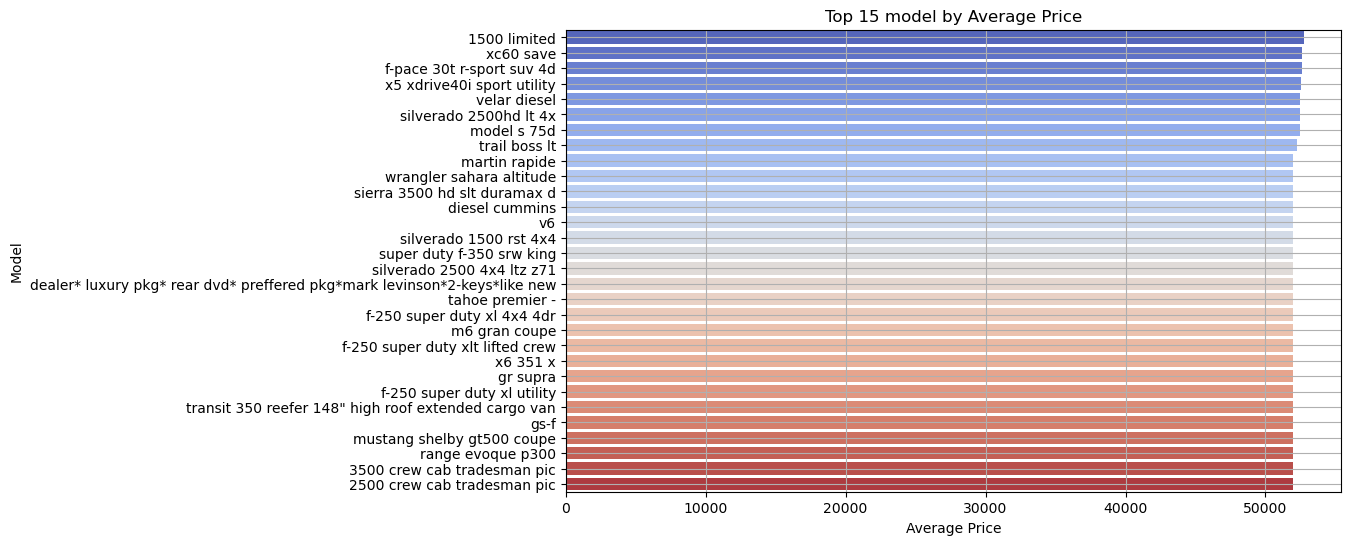

In [118]:
# Average Price by Manufacturer
avg_price_model = df_iqr.groupby('model')['price'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_model.values, y=avg_price_model.index, palette="coolwarm")
plt.title("Top 15 model by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Model")
plt.grid()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\2049257278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_model.values, y=avg_price_model.index, palette="coolwarm")


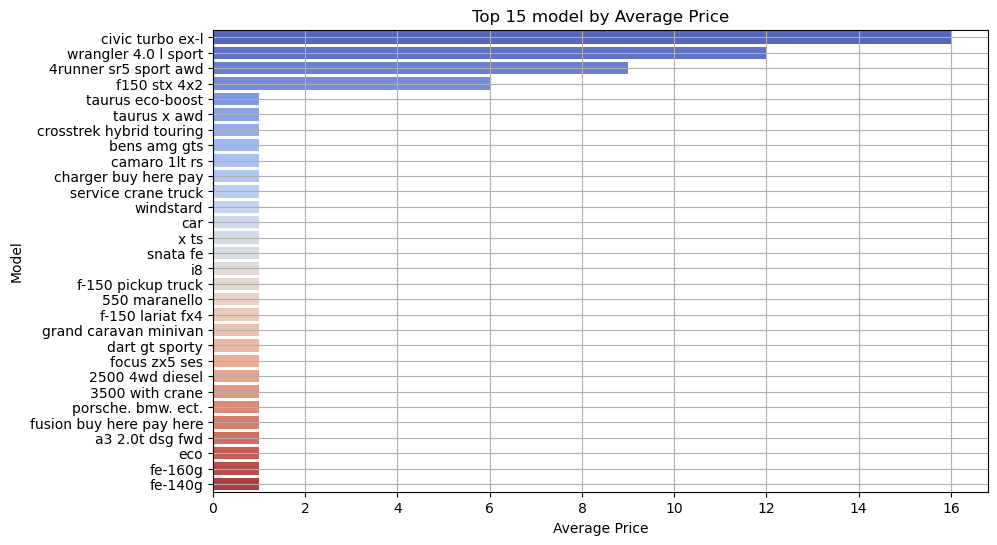

In [119]:
# Average Price by Manufacturer
avg_price_model = df_iqr.groupby('model')['price'].mean().sort_values(ascending=False).tail(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_model.values, y=avg_price_model.index, palette="coolwarm")
plt.title("Top 15 model by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Model")
plt.grid()
plt.show()

**Relationship with `condition`**

In [121]:
df_iqr['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', nan, 'salvage'],
      dtype=object)

In [122]:
df_iqr['condition'].nunique()

6

In [123]:
df_iqr.groupby('condition')['price'].describe()

count     mean      std  min     25%      50%      75%      max
condition                                                                   
excellent 59926.00 13861.05  9700.21 1.00 6900.00 10995.00 17995.00 52777.00
fair       4369.00  3512.81  3247.96 1.00 1500.00  2500.00  4250.00 38000.00
good      73681.00 18943.46 12677.38 1.00 6790.00 17990.00 29500.00 52778.00
like new  14315.00 17137.38 11826.49 1.00 7995.00 14000.00 23998.00 52600.00
new         678.00 19781.88 14420.36 1.00 7900.00 17000.00 29958.25 52000.00
salvage     418.00  4000.14  4883.67 1.00 1000.00  2000.00  5000.00 35989.00

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\2481487456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df_iqr, palette="Set2")


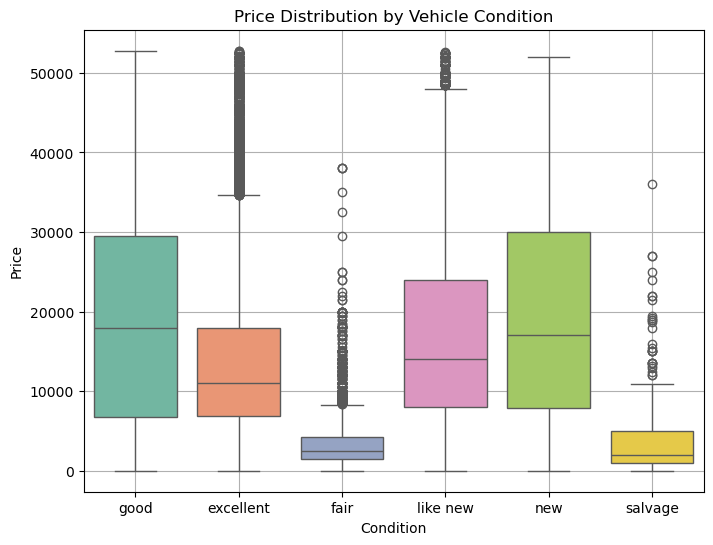

In [124]:
# Boxplot for Price by Condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.grid()
plt.show()


C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\1882249662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_condition.values, y=avg_price_condition.index, palette="coolwarm")


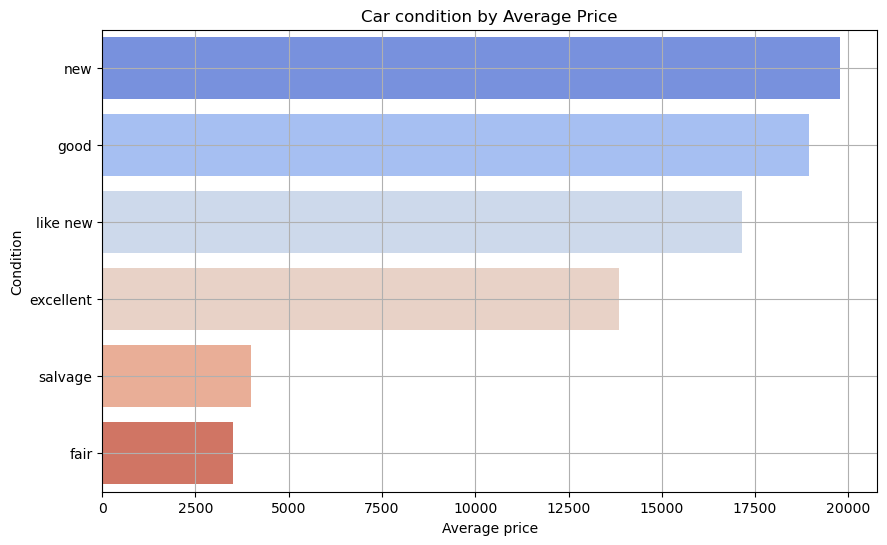

In [125]:
# Average Price by Condition
avg_price_condition = df_iqr.groupby('condition')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_condition.values, y=avg_price_condition.index, palette="coolwarm")
plt.title("Car condition by Average Price")
plt.xlabel("Average price")
plt.ylabel("Condition")
plt.grid()
plt.show()

**Relationship with `fuel`**

In [127]:
df_iqr['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [128]:
df_iqr['fuel'].nunique()

5

In [129]:
df_iqr.groupby('fuel')['price'].describe()

count     mean      std  min      25%      50%      75%      max
fuel                                                                         
diesel    11012.00 26300.49 13687.54 1.00 15000.00 25995.00 37500.00 52777.00
electric    931.00 22569.11 13292.76 1.00 11590.00 19990.00 34169.00 52495.00
gas      206890.00 15376.97 11443.01 1.00  6200.00 12000.00 22590.00 52778.00
hybrid     3377.00 14329.29 10092.87 1.00  6900.00 11500.00 19392.00 51000.00
other     15365.00 25511.57 10895.10 1.00 17990.00 25990.00 33590.00 52590.00

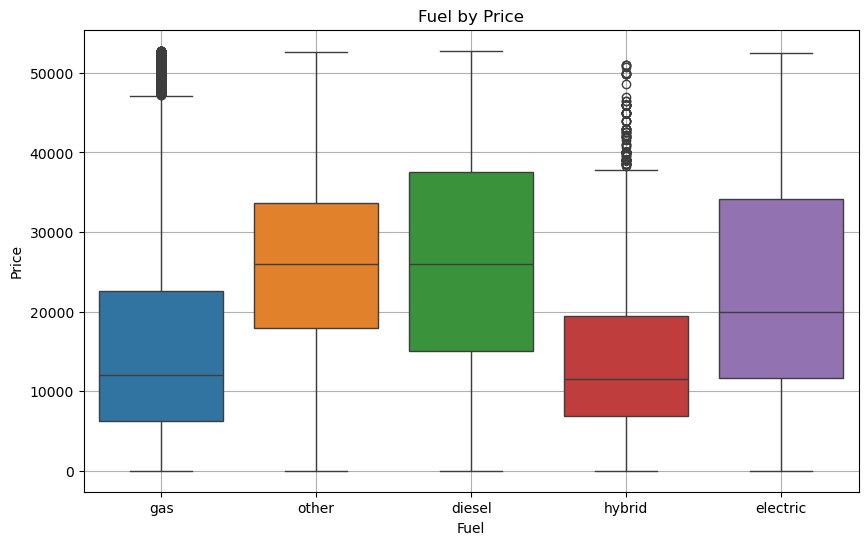

In [130]:
# Boxplot for Price by Fuel
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'fuel', y = 'price', data = df_iqr, hue = "fuel");
plt.title("Fuel by Price")
plt.xlabel("Fuel")
plt.ylabel("Price")
plt.grid()
plt.show()

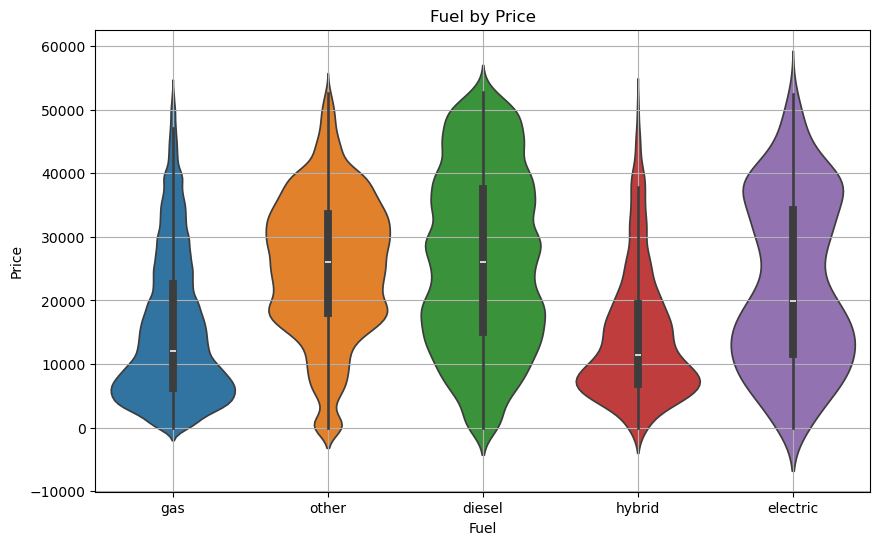

In [131]:
# Violin plot for Price by Fuel
plt.figure(figsize=(10, 6))
sns.violinplot(x = 'fuel', y = 'price', data = df_iqr, hue = "fuel");
plt.title("Fuel by Price")
plt.xlabel("Fuel")
plt.ylabel("Price")
plt.grid()
plt.show()

**Relationship with `title_status`**

In [133]:
df_iqr['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [134]:
df_iqr['title_status'].nunique()

6

In [135]:
df_iqr.groupby('title_status')['price'].describe()

count     mean      std  min      25%      50%      75%  \
title_status                                                               
clean        227635.00 16746.88 12050.27 1.00  6900.00 13995.00 24990.00   
lien           1182.00 19532.68 11546.88 1.00 10500.00 17000.00 26500.00   
missing         188.00  3091.24  5789.51 1.00   750.00  1500.00  3000.00   
parts only       87.00  3280.24  6323.42 1.00   700.00  1200.00  3750.00   
rebuilt        5552.00 12196.67  8411.24 1.00  6495.00  9995.00 15891.00   
salvage        2931.00  9725.09  7761.58 1.00  4250.00  7500.00 12985.00   

                  max  
title_status           
clean        52778.00  
lien         52500.00  
missing      49000.00  
parts only   50000.00  
rebuilt      50495.00  
salvage      49900.00

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\2892368355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='title_status', y='price', data=df_iqr, palette="Set2")


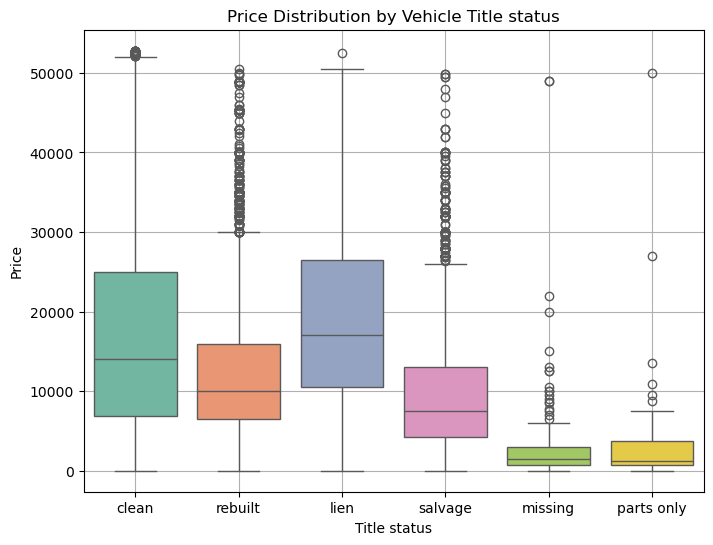

In [136]:
# Boxplot for Price by Title status
plt.figure(figsize=(8, 6))
sns.boxplot(x='title_status', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle Title status")
plt.xlabel("Title status")
plt.ylabel("Price")
plt.grid()
plt.show()


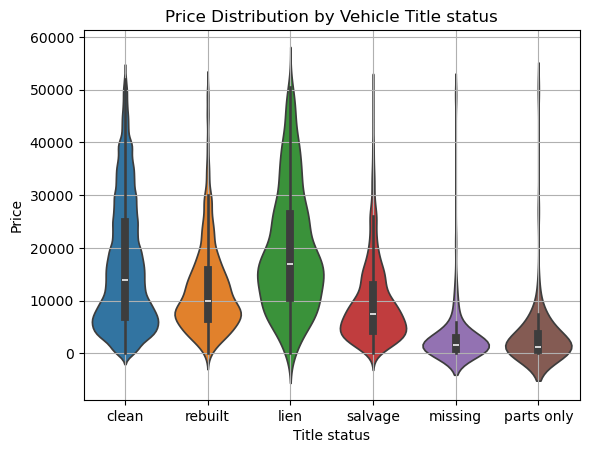

In [137]:
sns.violinplot(x = 'title_status', y = 'price', data = df_iqr, hue = "title_status");
plt.title("Price Distribution by Vehicle Title status")
plt.xlabel("Title status")
plt.ylabel("Price")
plt.grid()
plt.show()

**Relationship with `drive`**

In [139]:
df_iqr['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [140]:
df_iqr['drive'].nunique()

3

In [141]:
df_iqr.groupby('drive')['price'].describe()

count     mean      std  min     25%      50%      75%      max
drive                                                                   
4wd   72640.00 19819.93 13032.69 1.00 8900.00 17450.00 29958.25 52777.00
fwd   67226.00 11861.72  8323.08 1.00 5500.00  9777.00 16900.00 52181.00
rwd   30610.00 18992.99 12078.67 1.00 8499.00 17500.00 27990.00 52590.00

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\869168814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='drive', y='price', data=df_iqr, palette="Set2")


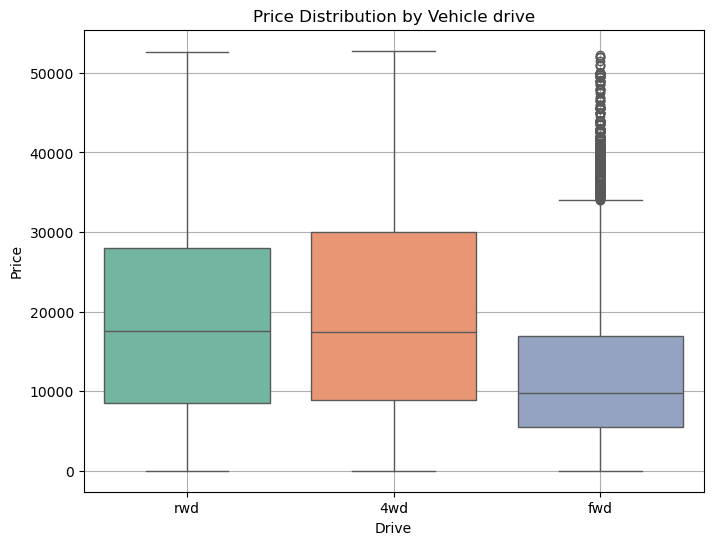

In [142]:
# Boxplot for Price by Drive
plt.figure(figsize=(8, 6))
sns.boxplot(x='drive', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle drive")
plt.xlabel("Drive")
plt.ylabel("Price")
plt.grid()
plt.show()


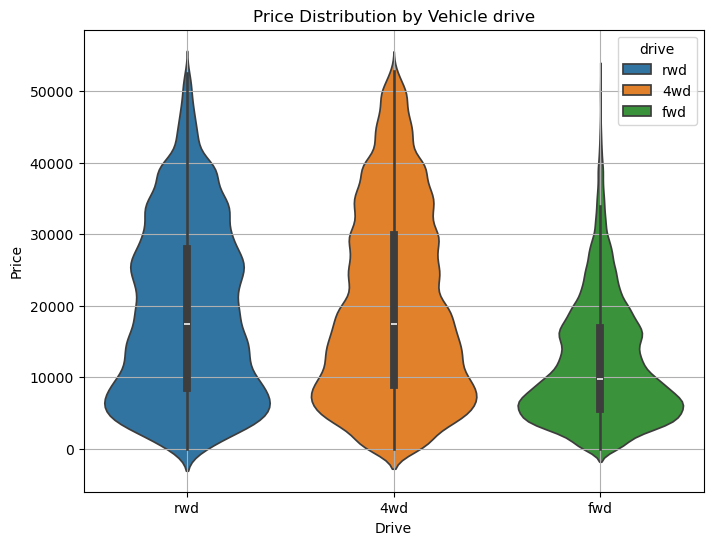

In [143]:
# Violin plot for Price by Drive
plt.figure(figsize=(8, 6))
sns.violinplot(x = 'drive', y = 'price', data = df_iqr, hue = "drive");
plt.title("Price Distribution by Vehicle drive")
plt.xlabel("Drive")
plt.ylabel("Price")
plt.grid()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\3138936625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_drive.values, y=avg_price_drive.index, palette="coolwarm")


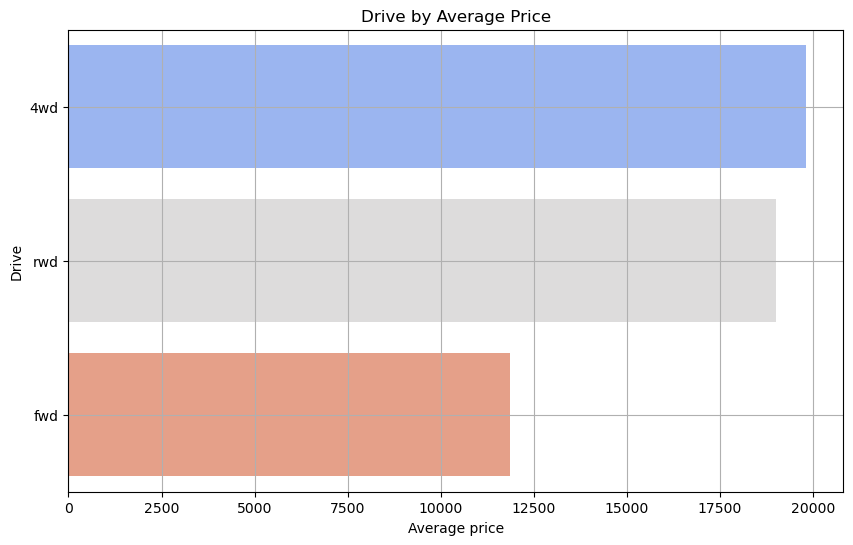

In [144]:
# Average Price by Drive
avg_price_drive = df_iqr.groupby('drive')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_drive.values, y=avg_price_drive.index, palette="coolwarm")
plt.title("Drive by Average Price")
plt.xlabel("Average price")
plt.ylabel("Drive")
plt.grid()
plt.show()

**Relationship with `size`**

In [146]:
df_iqr['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [147]:
df_iqr['size'].nunique()

4

In [148]:
df_iqr.groupby('size')['price'].describe()

count     mean      std  min     25%      50%      75%      max
size                                                                          
compact     12221.00 10898.39  8212.63 1.00 4995.00  8500.00 14926.00 52000.00
full-size   39098.00 14929.86 11395.91 1.00 6000.00 11700.00 20999.00 52777.00
mid-size    23756.00 11824.30  8992.68 1.00 5000.00  8995.00 16391.50 52000.00
sub-compact  1869.00 11973.98  9146.30 1.00 5555.00  8995.00 15995.00 51888.00

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\2159592858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size', y='price', data=df_iqr, palette="Set2")


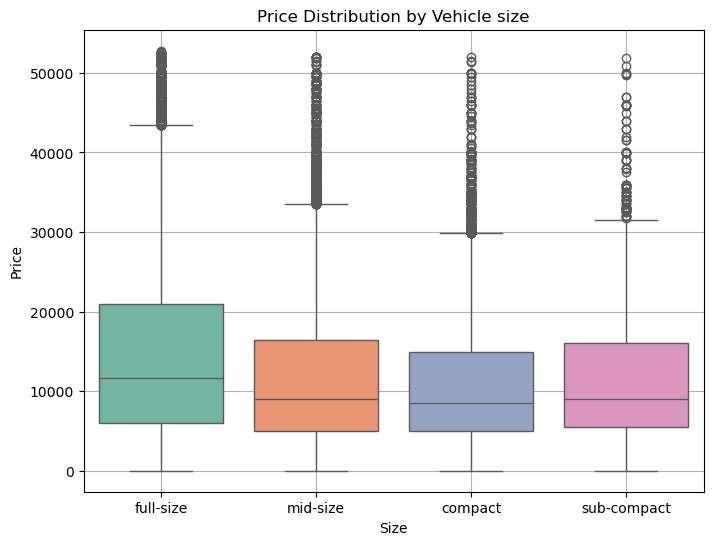

In [149]:
# Boxplot for Price by Size
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle size")
plt.xlabel("Size")
plt.ylabel("Price")
plt.grid()
plt.show()

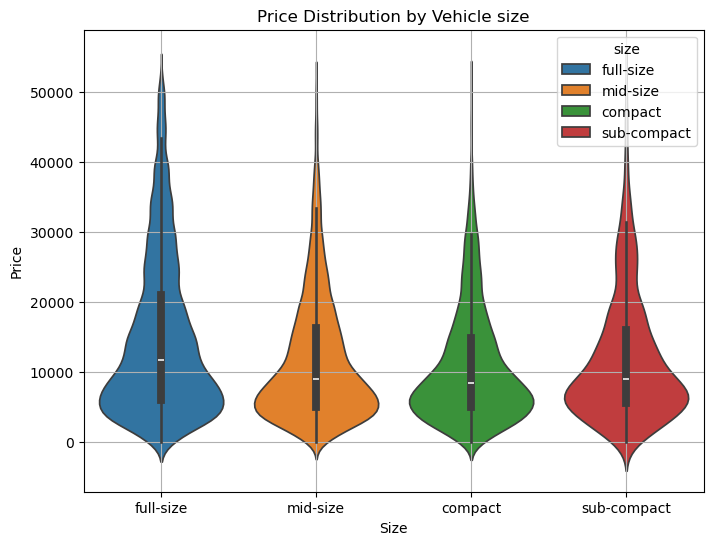

In [150]:
# Violin plot for Price by Size
plt.figure(figsize=(8, 6))
sns.violinplot(x = 'size', y = 'price', data = df_iqr, hue = "size");
plt.title("Price Distribution by Vehicle size")
plt.xlabel("Size")
plt.ylabel("Price")
plt.grid()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\2427250145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_size.values, y=avg_price_size.index, palette="coolwarm")


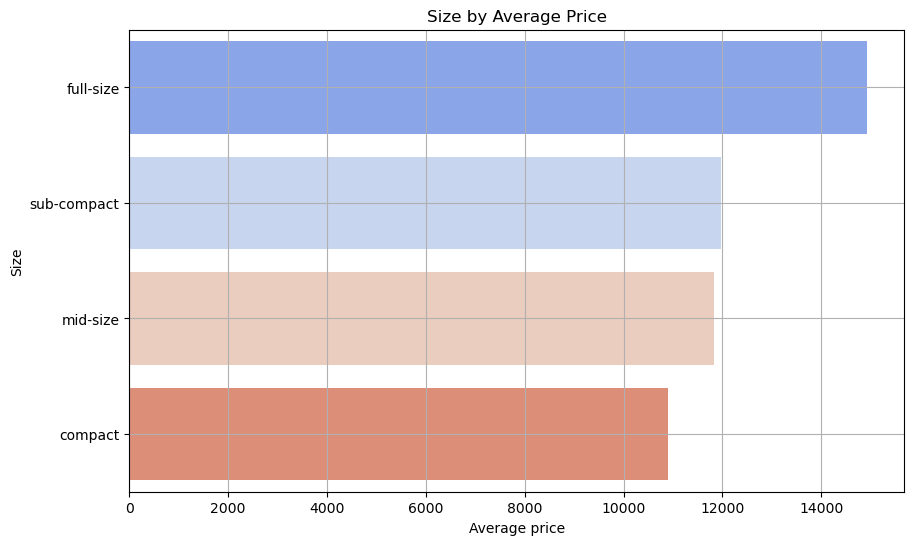

In [151]:
# Average Price by Size
avg_price_size = df_iqr.groupby('size')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_size.values, y=avg_price_size.index, palette="coolwarm")
plt.title("Size by Average Price")
plt.xlabel("Average price")
plt.ylabel("Size")
plt.grid()
plt.show()

**Relationship with `type`**

In [153]:
df_iqr['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', nan, 'wagon', 'van',
       'bus'], dtype=object)

In [154]:
df_iqr['type'].nunique()

13

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\3678115172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='price', data=df_iqr, palette="Set2")


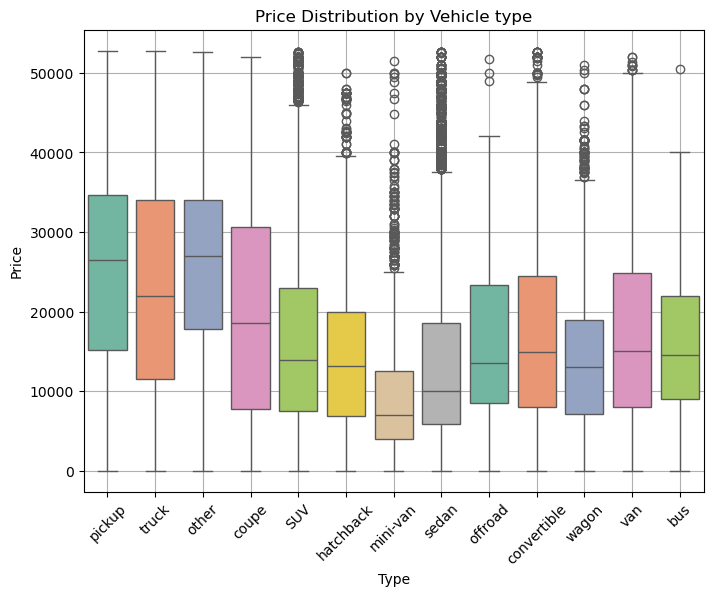

In [155]:
# Boxplot for Price by Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle type")
plt.xlabel("Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\4020773540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_type.values, y=avg_price_type.index, palette="coolwarm")


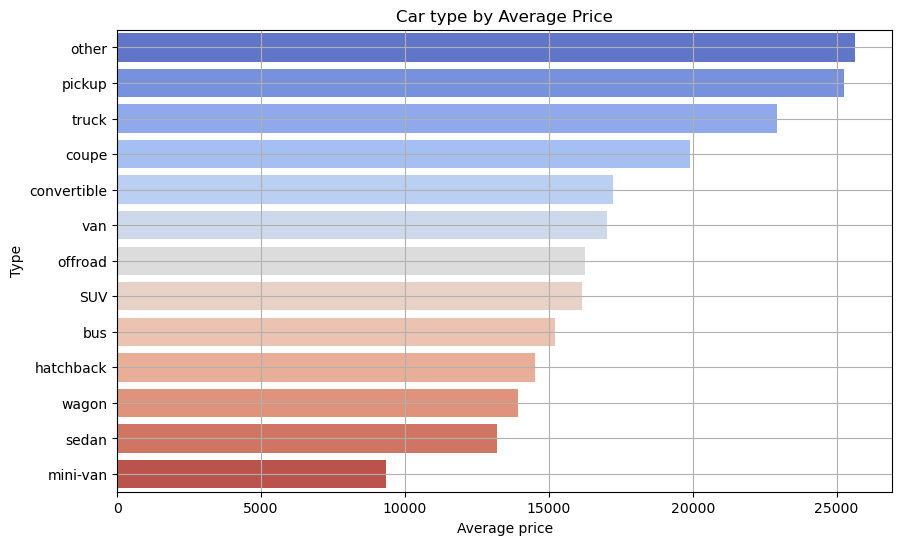

In [156]:
# Average Price by Manufacturer
avg_price_type = df_iqr.groupby('type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_type.values, y=avg_price_type.index, palette="coolwarm")
plt.title("Car type by Average Price")
plt.xlabel("Average price")
plt.ylabel("Type")
plt.grid()
plt.show()

**Relationship with `state`**

In [158]:
df_iqr['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [159]:
df_iqr['state'].nunique()

51

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\1905983490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='price', data=df_iqr, palette="Set2")


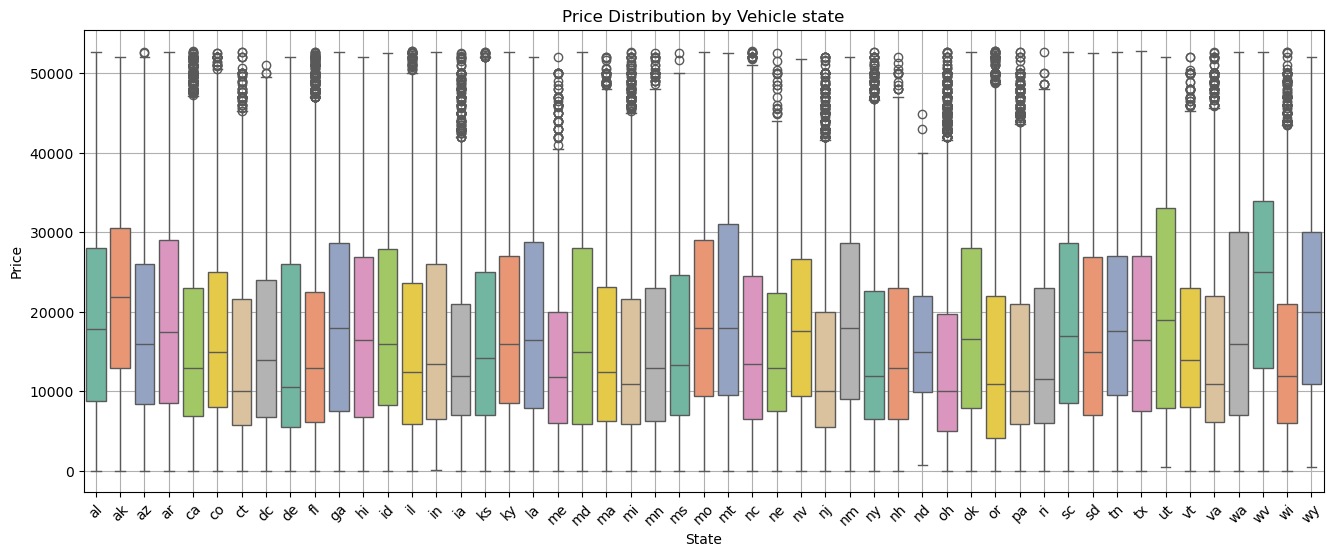

In [160]:
# Boxplot for Price by State
plt.figure(figsize=(16, 6))
sns.boxplot(x='state', y='price', data=df_iqr, palette="Set2")
plt.title("Price Distribution by Vehicle state")
plt.xlabel("State")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_15256\2961925889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_state.values, y=avg_price_state.index, palette="coolwarm")


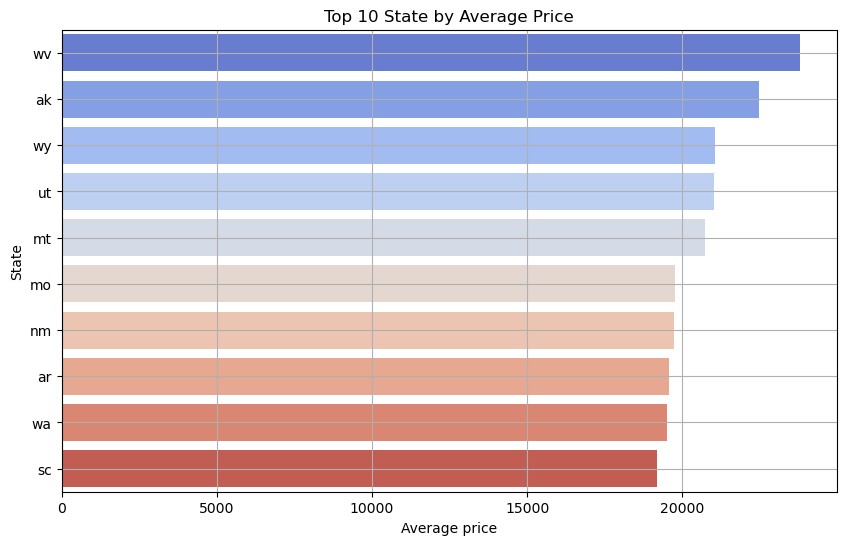

In [161]:
# Average Price by State
avg_price_state = df_iqr.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_state.values, y=avg_price_state.index, palette="coolwarm")
plt.title("Top 10 State by Average Price")
plt.xlabel("Average price")
plt.ylabel("State")
plt.grid()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_5648\1941279251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_state.values, y=avg_price_state.index, palette="coolwarm")


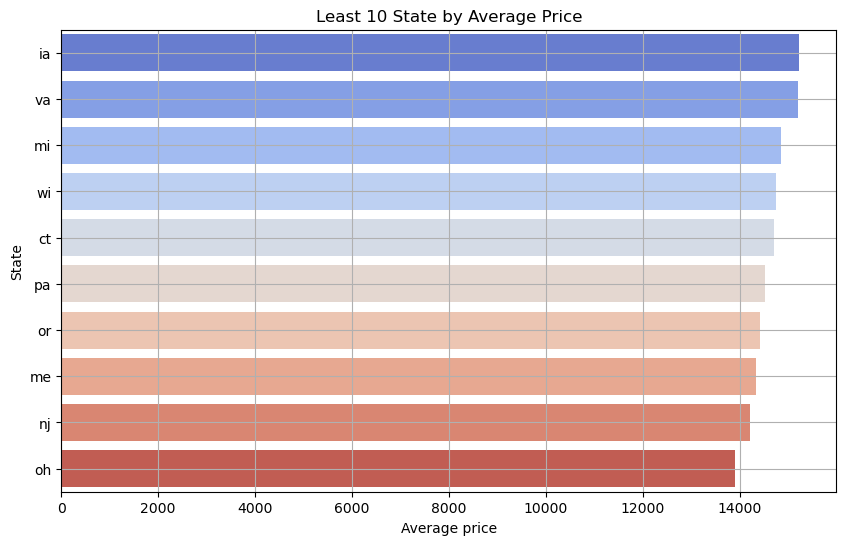

In [246]:
# Average Price by State
avg_price_state = df_iqr.groupby('state')['price'].mean().sort_values(ascending=False).tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_state.values, y=avg_price_state.index, palette="coolwarm")
plt.title("Least 10 State by Average Price")
plt.xlabel("Average price")
plt.ylabel("State")
plt.grid()
plt.show()

## Numeric Data Prep

### Selecting only numeric values

**List of columns to be used**

In [166]:
df_iqr.select_dtypes(['int', 'float']).head(3)

price  year  odometer  cylinders_numeric
27  33590  2014  57923.00               8.00
28  22590  2010  71229.00               8.00
29  39590  2020  19160.00               8.00

In [167]:
numeric_cols = df_iqr.select_dtypes(['int', 'float']).columns.tolist()

In [168]:
numeric_cols

['price', 'year', 'odometer', 'cylinders_numeric']

In [169]:
df_numeric = df_iqr[numeric_cols].copy()
df_numeric.head()

price  year  odometer  cylinders_numeric
27  33590  2014  57923.00               8.00
28  22590  2010  71229.00               8.00
29  39590  2020  19160.00               8.00
30  30990  2017  41124.00               8.00
31  15000  2013 128000.00               6.00

In [170]:
df_numeric.isna().mean()

price               0.00
year                0.00
odometer            0.00
cylinders_numeric   0.38
dtype: float64

**Train-Test Split**

In [172]:
# Separate Features and Target
X = df_numeric.drop(columns = ['price'])
y = df_numeric['price']

### Missing Value Imputation

## Simple Imputer

In [175]:
print(X.isna().sum())

year                     0
odometer                 0
cylinders_numeric    90228
dtype: int64


In [176]:
# initiate the imputer
si = SimpleImputer(strategy = "median")

# fit and transform the train data 
X = si.fit_transform(X)

In [177]:
print(X.isna().sum())

year                 0
odometer             0
cylinders_numeric    0
dtype: int64


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

**Check the status**

In [180]:
print(X_train.shape)
print(X_test.shape)

print("=" * 50)

print(y_train.shape)
print(y_test.shape)

(190060, 3)
(47515, 3)
(190060,)
(47515,)


## Numerical Model Fitting

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Results:
The value of rmse is 8313.18
The value of r2 is 0.53
------------------------------
Ridge Regression Results:
The value of rmse is 8313.18
The value of r2 is 0.53
------------------------------
Lasso Regression Results:
The value of rmse is 8313.18
The value of r2 is 0.53
------------------------------


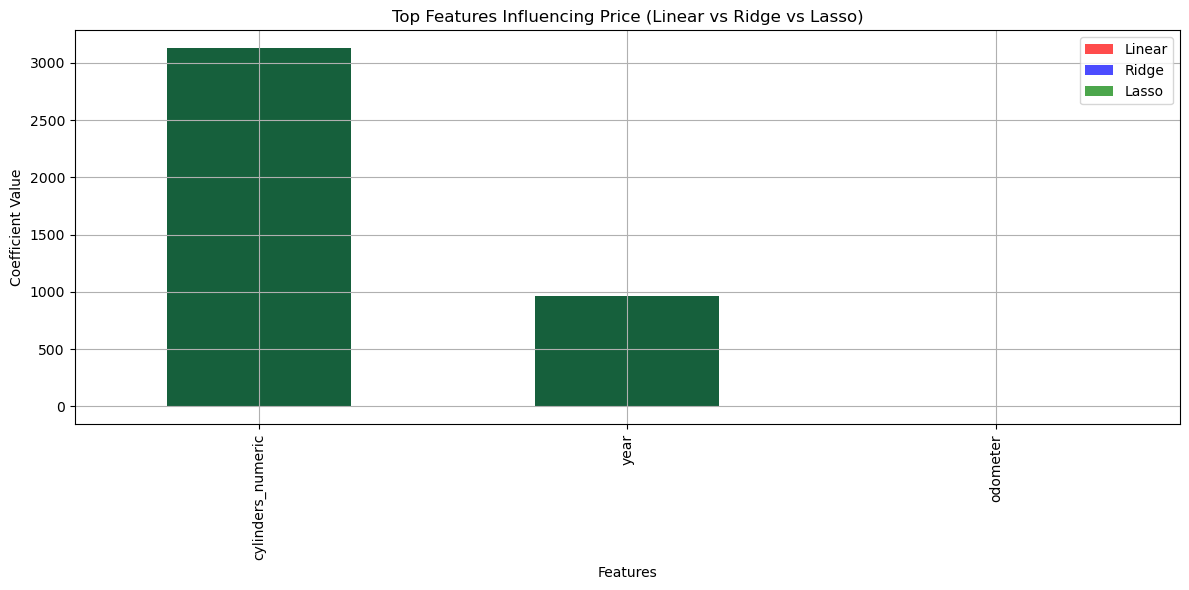

Linear Coefficients:
 year                 968.27
odometer              -0.05
cylinders_numeric   3127.92
dtype: float64
Ridge Coefficients:
 year                 968.27
odometer              -0.05
cylinders_numeric   3127.91
dtype: float64
Lasso Coefficients:
 year                 968.26
odometer              -0.05
cylinders_numeric   3127.85
dtype: float64


In [182]:
# Step 1: Initialize Models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Step 2: Fit Models and Predict
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Step 3: Evaluate Models
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Results:")
    print("The value of rmse is {:.2f}".format(mse))
    print("The value of r2 is {:.2f}".format(r2))
    print("-" * 30)
    return mse, r2

mse_lr, r2_lr = evaluate_model("Linear Regression", y_test, y_pred_lr)
mse_ridge, r2_ridge = evaluate_model("Ridge Regression", y_test, y_pred_ridge)
mse_lasso, r2_lasso = evaluate_model("Lasso Regression", y_test, y_pred_lasso)

# Step 4: Coefficients for Ridge and Lasso
linear_coefficients = pd.Series(linear_model.coef_, index=X.columns) 
ridge_coefficients = pd.Series(ridge_model.coef_, index=X.columns)
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)

# Step 5: Results
results = {
    "Linear Regression": {"MSE": mse_lr, "R2": r2_lr},
    "Ridge Regression": {"MSE": mse_ridge, "R2": r2_ridge},
    "Lasso Regression": {"MSE": mse_lasso, "R2": r2_lasso},
}

# Step 6: Visualize Coefficients for Ridge and Lasso
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
linear_coefficients.sort_values(ascending=False).head(10).plot(kind='bar', color='red', alpha=0.7, label='Linear')
ridge_coefficients.sort_values(ascending=False).head(10).plot(kind='bar', color='blue', alpha=0.7, label='Ridge')
lasso_coefficients.sort_values(ascending=False).head(10).plot(kind='bar', color='green', alpha=0.7, label='Lasso')
plt.title("Top Features Influencing Price (Linear vs Ridge vs Lasso)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

results
print("Linear Coefficients:\n", linear_coefficients)
print("Ridge Coefficients:\n", ridge_coefficients)
print("Lasso Coefficients:\n", lasso_coefficients)


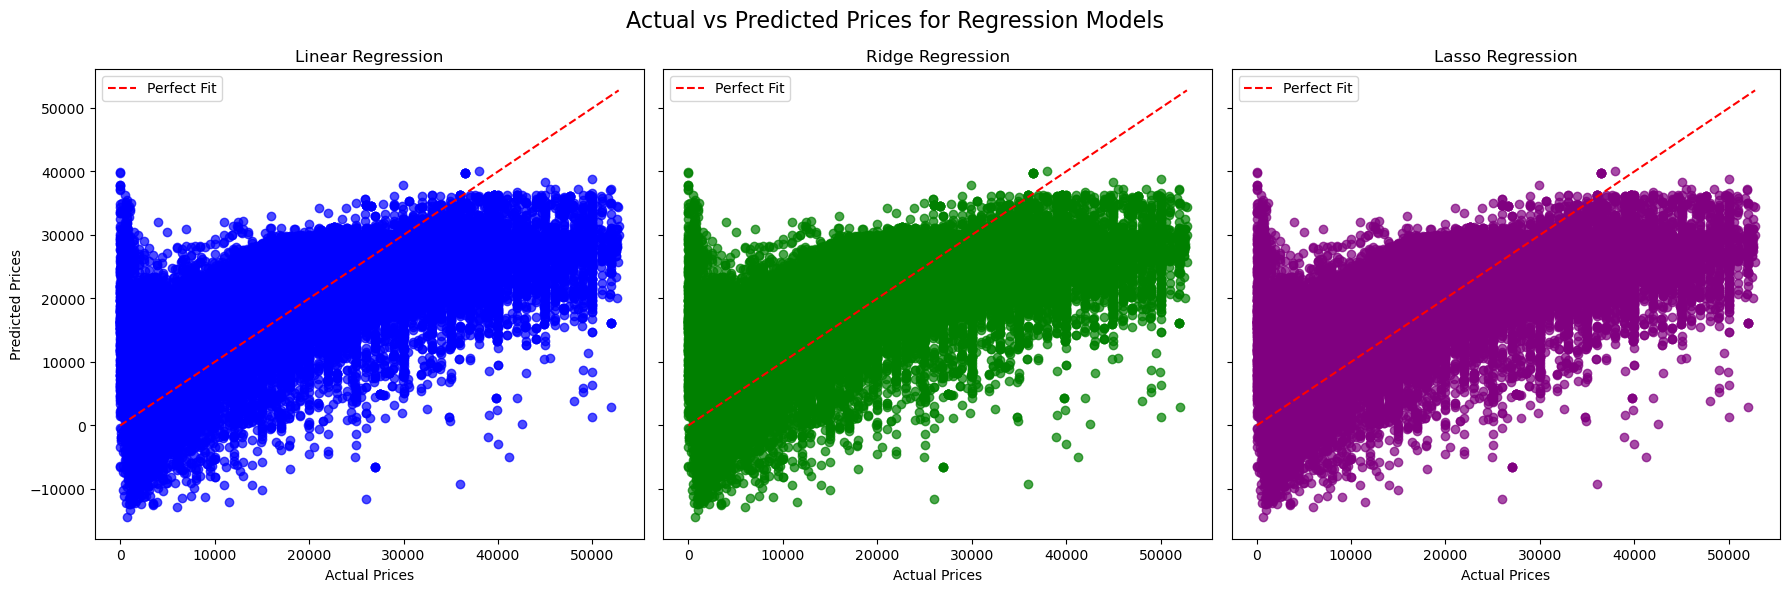

In [183]:
# Function to plot Actual vs Predicted Prices using Subplots
def plot_actual_vs_predicted_subplots(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle("Actual vs Predicted Prices for Regression Models", fontsize=16)

    # Linear Regression
    axes[0].scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
    axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
    axes[0].set_title("Linear Regression")
    axes[0].set_xlabel("Actual Prices")
    axes[0].set_ylabel("Predicted Prices")
    axes[0].legend()

    # Ridge Regression
    axes[1].scatter(y_test, y_pred_ridge, alpha=0.7, color='green')
    axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
    axes[1].set_title("Ridge Regression")
    axes[1].set_xlabel("Actual Prices")
    axes[1].legend()

    # Lasso Regression
    axes[2].scatter(y_test, y_pred_lasso, alpha=0.7, color='purple')
    axes[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
    axes[2].set_title("Lasso Regression")
    axes[2].set_xlabel("Actual Prices")
    axes[2].legend()

    # Layout adjustment
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

# Call the function with predictions
plot_actual_vs_predicted_subplots(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso)

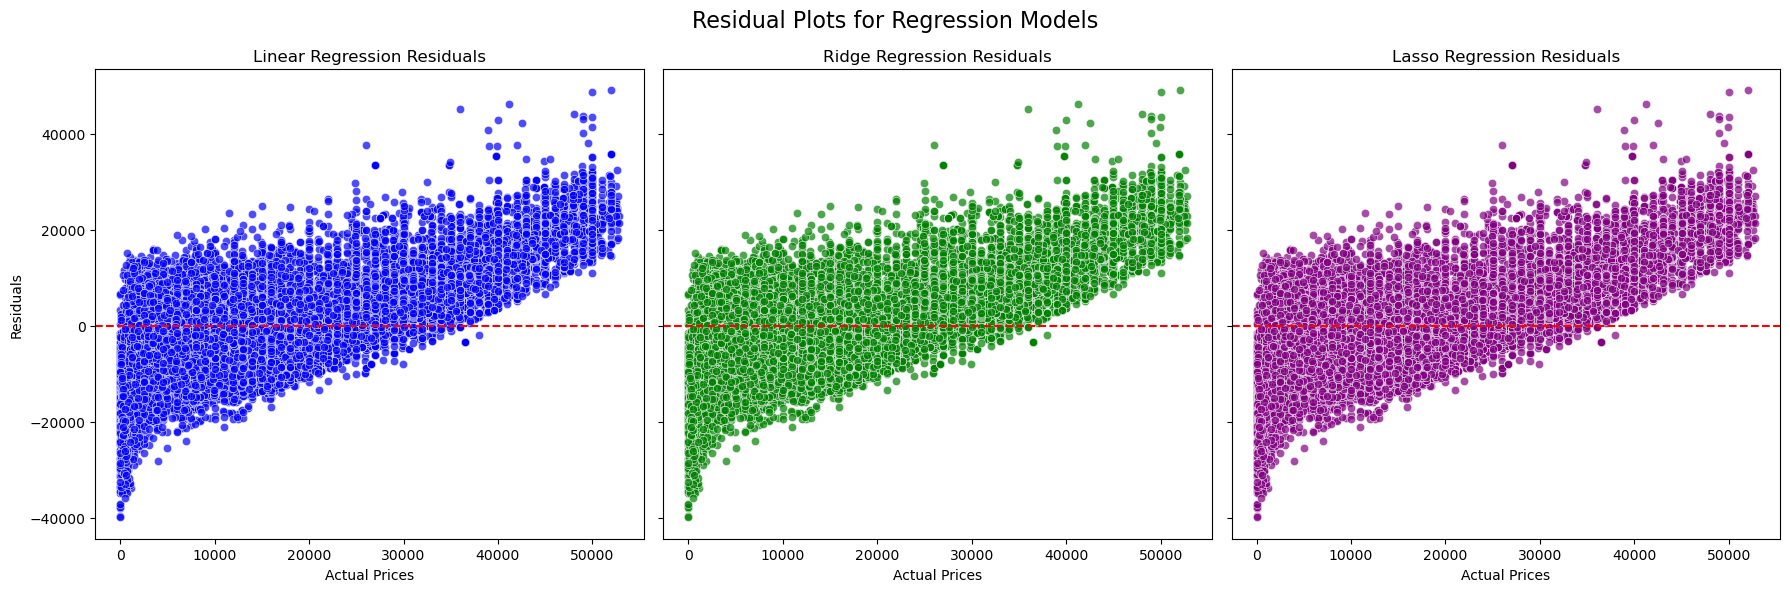

Cross-Validation Results (5-Fold):
Ridge Regression Mean R2 Score: 0.52
Lasso Regression Mean R2 Score: 0.52
----------------------------------------


In [184]:
# Function to plot residuals for all models using subplots
def plot_residuals(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso):
    residuals_lr = y_test - y_pred_lr
    residuals_ridge = y_test - y_pred_ridge
    residuals_lasso = y_test - y_pred_lasso
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle("Residual Plots for Regression Models", fontsize=16)

    # Linear Regression Residuals
    sns.scatterplot(x=y_test, y=residuals_lr, ax=axes[0], color='blue', alpha=0.7)
    axes[0].axhline(y=0, color='red', linestyle='--')
    axes[0].set_title("Linear Regression Residuals")
    axes[0].set_xlabel("Actual Prices")
    axes[0].set_ylabel("Residuals")

    # Ridge Regression Residuals
    sns.scatterplot(x=y_test, y=residuals_ridge, ax=axes[1], color='green', alpha=0.7)
    axes[1].axhline(y=0, color='red', linestyle='--')
    axes[1].set_title("Ridge Regression Residuals")
    axes[1].set_xlabel("Actual Prices")

    # Lasso Regression Residuals
    sns.scatterplot(x=y_test, y=residuals_lasso, ax=axes[2], color='purple', alpha=0.7)
    axes[2].axhline(y=0, color='red', linestyle='--')
    axes[2].set_title("Lasso Regression Residuals")
    axes[2].set_xlabel("Actual Prices")

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

# Cross-validation for Ridge and Lasso
def cross_validate_models(X_train, y_train):
    ridge_cv = cross_val_score(Ridge(alpha=1.0), X_train, y_train, cv=5, scoring='r2')
    lasso_cv = cross_val_score(Lasso(alpha=0.1), X_train, y_train, cv=5, scoring='r2')

    print("Cross-Validation Results (5-Fold):")
    print("Ridge Regression Mean R2 Score: {:.2f}".format(ridge_cv.mean()))
    print("Lasso Regression Mean R2 Score: {:.2f}".format(lasso_cv.mean()))
    print("-" * 40)

    return ridge_cv, lasso_cv

# Call Residual Plot Function
plot_residuals(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso)

# Perform Cross-Validation
ridge_cv, lasso_cv = cross_validate_models(X_train, y_train)

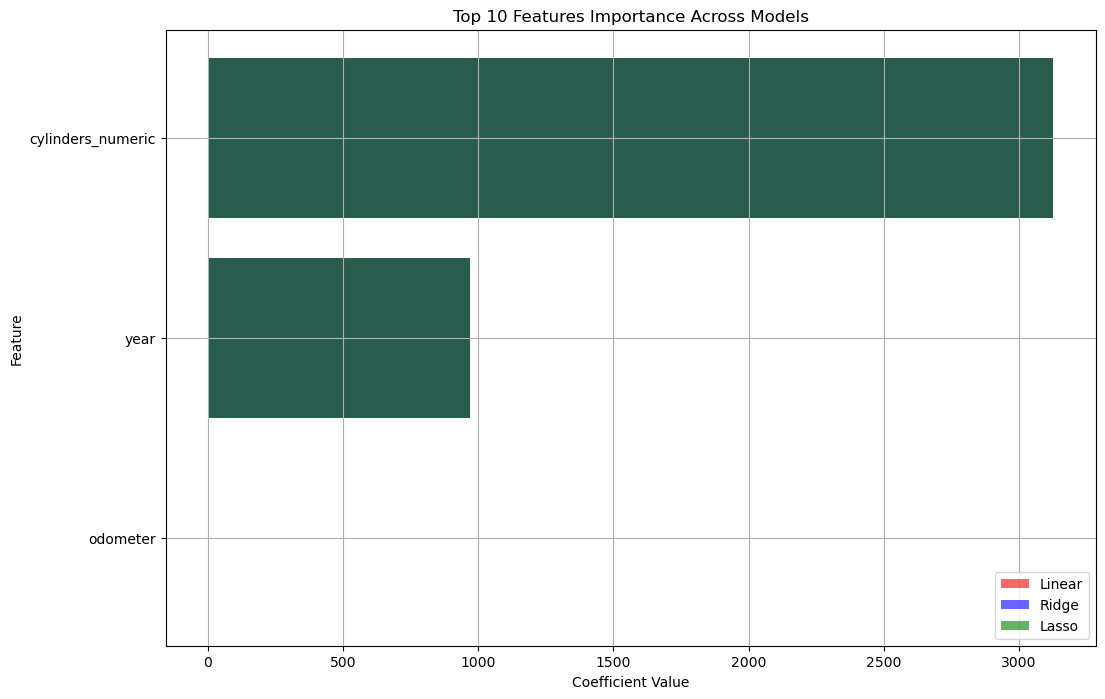

In [185]:
# Function to plot feature importance
def plot_feature_importance(linear_coeffs, ridge_coeffs, lasso_coeffs, feature_names):
    # Combine coefficients into a DataFrame for visualization
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Linear": linear_coeffs,
        "Ridge": ridge_coeffs,
        "Lasso": lasso_coeffs
    })
    
    # Sort features by Linear Regression coefficients for consistent ordering
    importance_df = importance_df.sort_values(by="Linear", ascending=False).head(10)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df["Feature"], importance_df["Linear"], color='red', alpha=0.6, label='Linear')
    plt.barh(importance_df["Feature"], importance_df["Ridge"], color='blue', alpha=0.6, label='Ridge')
    plt.barh(importance_df["Feature"], importance_df["Lasso"], color='green', alpha=0.6, label='Lasso')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title("Top 10 Features Importance Across Models")
    plt.legend()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.show()

# Extract coefficients and feature names
feature_names = X.columns
linear_coefficients = linear_model.coef_
ridge_coefficients = ridge_model.coef_
lasso_coefficients = lasso_model.coef_

# Call the function to plot feature importance
plot_feature_importance(linear_coefficients, ridge_coefficients, lasso_coefficients, feature_names)


## Numerical and Categorical Data Prep

In [187]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237575 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              237575 non-null  int64  
 1   year               237575 non-null  int64  
 2   manufacturer       237575 non-null  object 
 3   model              237575 non-null  object 
 4   condition          153387 non-null  object 
 5   fuel               237575 non-null  object 
 6   odometer           237575 non-null  float64
 7   title_status       237575 non-null  object 
 8   transmission       237575 non-null  object 
 9   drive              170476 non-null  object 
 10  size               76944 non-null   object 
 11  type               185884 non-null  object 
 12  paint_color        173953 non-null  object 
 13  state              237575 non-null  object 
 14  cylinders_numeric  147347 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 37.1+

In [188]:
df_iqr.select_dtypes("object").shape

(237575, 11)

In [189]:
df_iqr.select_dtypes("object").columns

Index(['manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

**Check the unique values**

In [191]:
df_iqr.select_dtypes("object").agg(["nunique"])

manufacturer  model  condition  fuel  title_status  transmission  \
nunique            40  18191          6     5             6             3   

         drive  size  type  paint_color  state  
nunique      3     4    13           12     51

## Numerical and Categorical Model-Fitting

In [192]:
# Let's create a copy of the dataset that only has 3 features in order to keep things simple
Num_Categ_features = ['year', 'odometer', 'cylinders_numeric','condition','transmission','fuel','title_status','price']
Num_Categ_features_data = pd.DataFrame(df_iqr[Num_Categ_features])

# Create a SimpleImputer instance for numerical data
numerical_imputer = SimpleImputer(strategy='mean')

# Impute missing numerical data
Num_Categ_features_data[['cylinders_numeric']] = numerical_imputer.fit_transform(Num_Categ_features_data[['cylinders_numeric']])

# Create a SimpleImputer instance for categorical data
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing categorical data
Num_Categ_features_data['condition'] = categorical_imputer.fit_transform(Num_Categ_features_data[['condition']])

# let's create "dummies" that represent whether it is thursday, friday, saturday, or sunday
dummies = pd.get_dummies(Num_Categ_features_data[['condition','transmission','fuel','title_status']])
data_w_dummies = pd.concat([Num_Categ_features_data, dummies], axis=1)

#drop the non-numeric column
data = data_w_dummies.drop(columns = ["condition","transmission","fuel","title_status"])

pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 2)), ('quad_model', LinearRegression())])

X = data.drop(columns = 'price')
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 23)

lr = LinearRegression()

# fit the model
pipe.fit(X_train, y_train)

# R^2 of the model
lr_r2 = (pipe.score(X_train, y_train))
print("The value of lr_r2 is {:.2f}".format(lr_r2))

# Predictions on test 
lr_predict = pipe.predict(X_test)

# rmse
lr_rmse = mean_squared_error(y_test, lr_predict, squared = False)
print("The value of lr rmse is {:.2f}".format(lr_rmse))

The value of lr_r2 is 0.64
The value of lr rmse is 7335.97


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


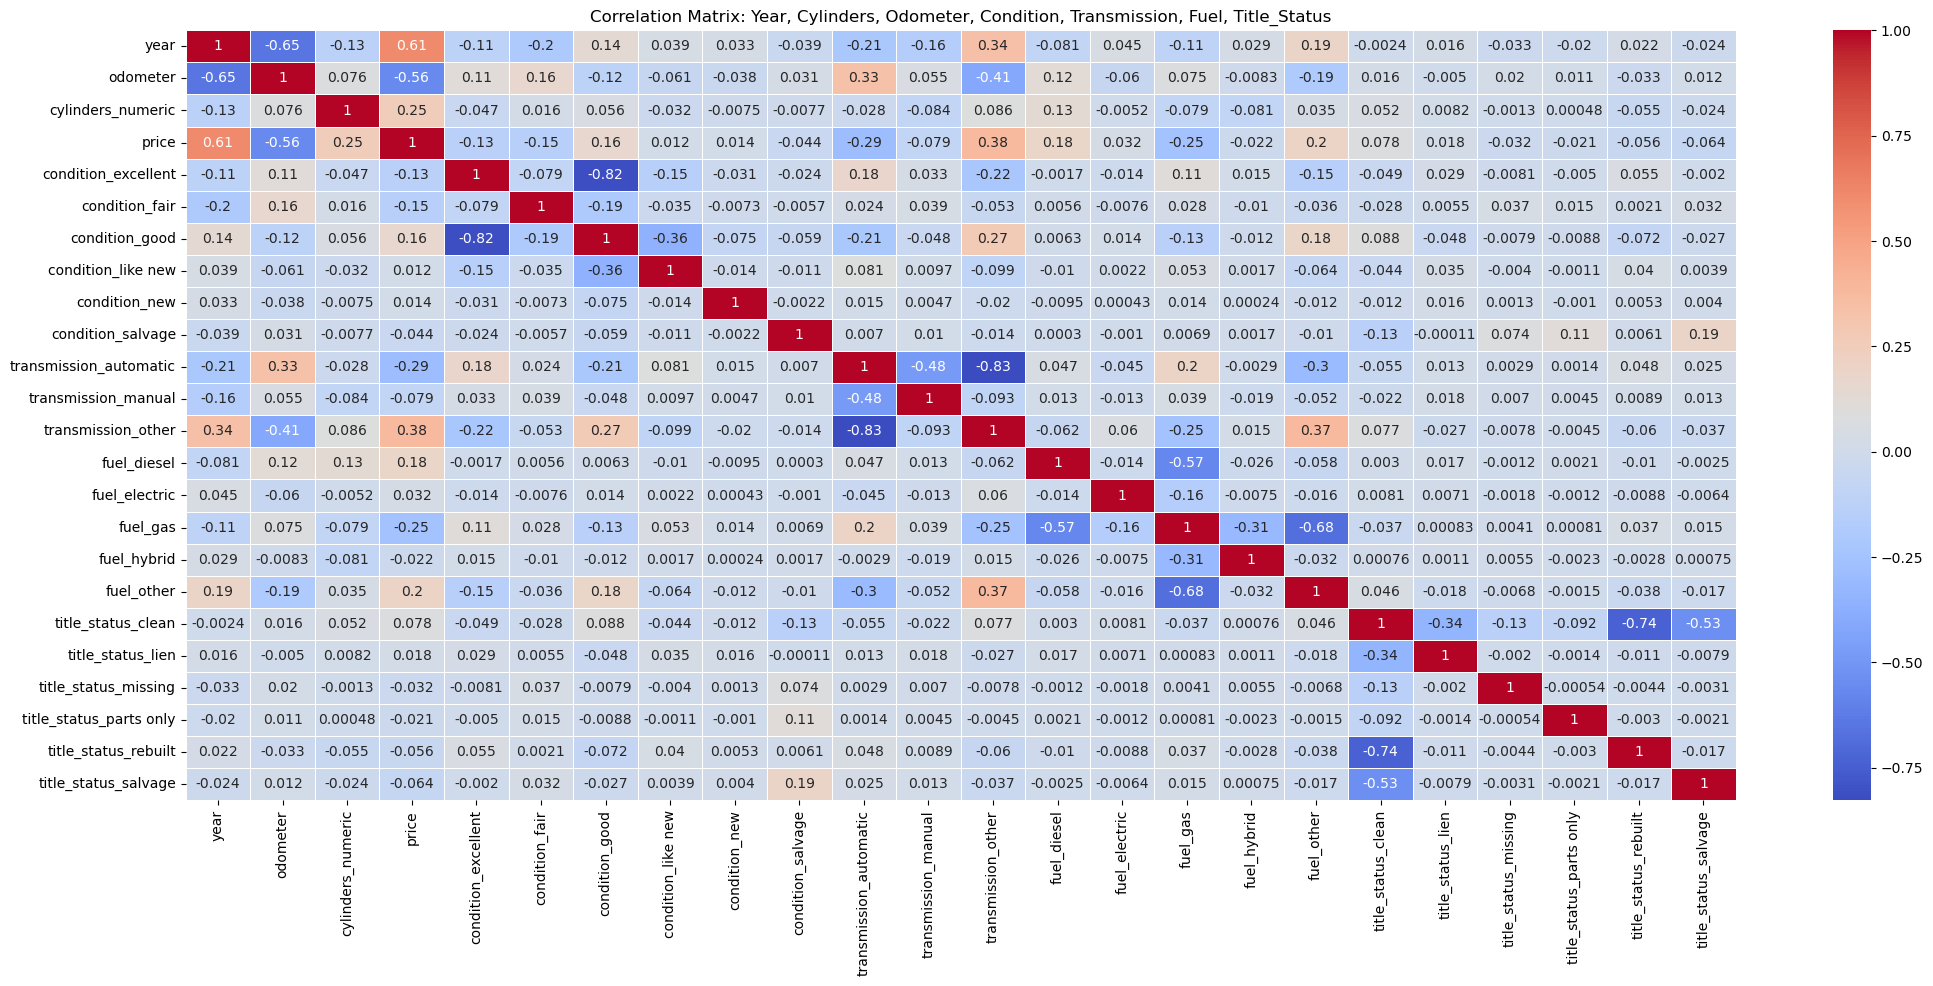

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Results:
RMSE: 7332.65
R2 Score: 0.62
----------------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.55179e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression Results:
RMSE: 7310.48
R2 Score: 0.63
----------------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e+12, tolerance: 2.732e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso Regression Results:
RMSE: 7560.03
R2 Score: 0.60
----------------------------------------


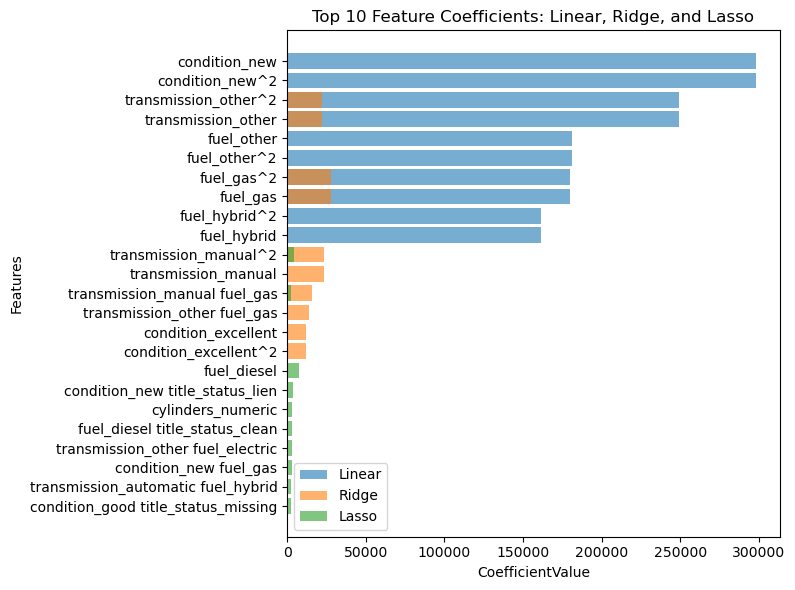

In [193]:
# Original data setup
Num_Categ_features = ['year', 'odometer', 'cylinders_numeric', 'condition', 'transmission', 'fuel', 'title_status', 'price']
Num_Categ_features_data = pd.DataFrame(df_iqr[Num_Categ_features])

# Impute missing data
from sklearn.impute import SimpleImputer

# Numerical Imputer
numerical_imputer = SimpleImputer(strategy='mean')
Num_Categ_features_data[['cylinders_numeric']] = numerical_imputer.fit_transform(Num_Categ_features_data[['cylinders_numeric']])

# Categorical Imputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
Num_Categ_features_data['condition'] = categorical_imputer.fit_transform(Num_Categ_features_data[['condition']])

# One-Hot Encoding
dummies = pd.get_dummies(Num_Categ_features_data[['condition', 'transmission', 'fuel', 'title_status']])
data_w_dummies = pd.concat([Num_Categ_features_data, dummies], axis=1)

# Drop non-numeric columns
data = data_w_dummies.drop(columns=["condition", "transmission", "fuel", "title_status"])

# Correlation Analysis: Odometer, Year, and Price

corr = data.corr(numeric_only = True)
#sns.heatmap(corr, annot = True);
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Year, Cylinders, Odometer, Condition, Transmission, Fuel, Title_Status")
plt.show()

# Features and Target
X = data.drop(columns='price')
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# Define models with Polynomial Features
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

# Store Results
results = {}
coefficients = {}

for model_name, model in models.items():
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('model', model)
    ])
    
    # Train the model
    pipe.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipe.predict(X_test)
    
    # Metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"RMSE": rmse, "R2": r2}
    
    # Extract Coefficients
    feature_names = pipe.named_steps['poly'].get_feature_names_out(X.columns)
    coeffs = pipe.named_steps['model'].coef_
    coefficients[model_name] = pd.DataFrame({"Feature": feature_names, "Coefficient": coeffs})
    
    # Print Results
    print(f"{model_name} Regression Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-" * 40)
    #print(coefficients[model_name])

# Visualize Coefficients
def plot_coefficients(coefficients, title):
    plt.figure(figsize=(8, 6))
    for model_name, coeff_df in coefficients.items():
        coeff_df = coeff_df.sort_values(by="Coefficient", ascending=False).head(10)
        plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], alpha=0.6, label=model_name)
    plt.title(title)
    plt.xlabel("CoefficientValue")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the top coefficients for all models
plot_coefficients(coefficients, "Top 10 Feature Coefficients: Linear, Ridge, and Lasso")


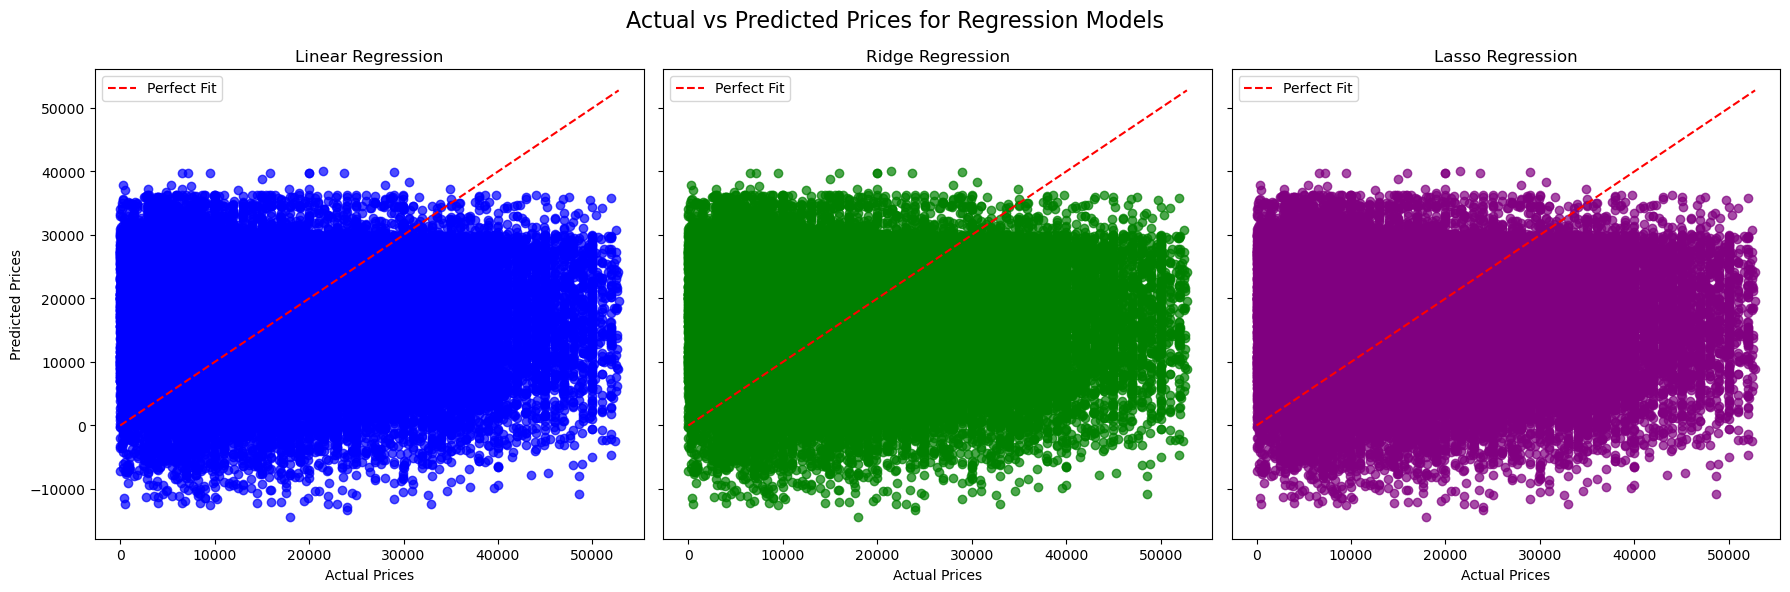

In [194]:
# Function to plot Actual vs Predicted Prices using Subplots
def plot_actual_vs_predicted_subplots(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle("Actual vs Predicted Prices for Regression Models", fontsize=16)

    # Linear Regression
    axes[0].scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
    axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
    axes[0].set_title("Linear Regression")
    axes[0].set_xlabel("Actual Prices")
    axes[0].set_ylabel("Predicted Prices")
    axes[0].legend()

    # Ridge Regression
    axes[1].scatter(y_test, y_pred_ridge, alpha=0.7, color='green')
    axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
    axes[1].set_title("Ridge Regression")
    axes[1].set_xlabel("Actual Prices")
    axes[1].legend()

    # Lasso Regression
    axes[2].scatter(y_test, y_pred_lasso, alpha=0.7, color='purple')
    axes[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
    axes[2].set_title("Lasso Regression")
    axes[2].set_xlabel("Actual Prices")
    axes[2].legend()

    # Layout adjustment
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

# Call the function with predictions
plot_actual_vs_predicted_subplots(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso)

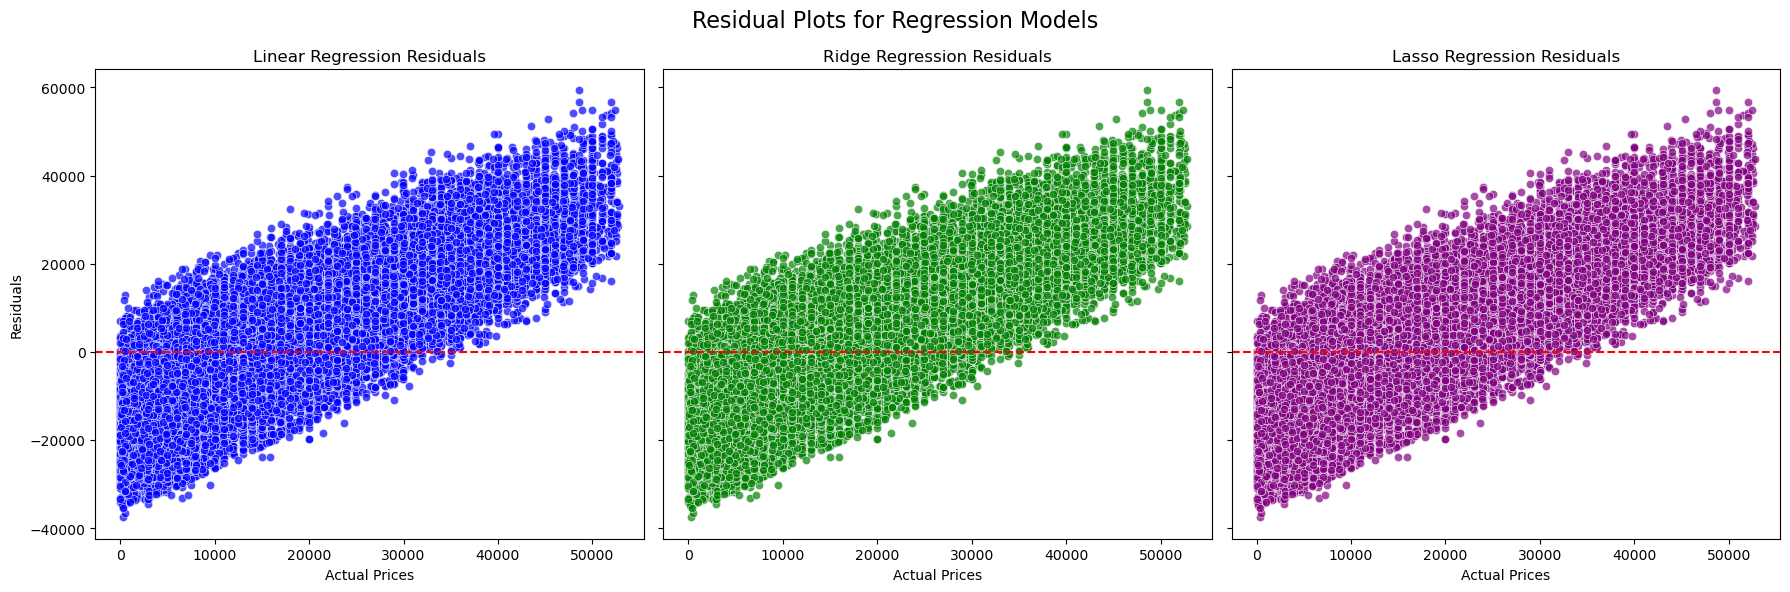

Cross-Validation Results (5-Fold):
Ridge Regression Mean R2 Score: 0.59
Lasso Regression Mean R2 Score: 0.59
----------------------------------------


In [195]:
# Function to plot residuals for all models using subplots
def plot_residuals(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso):
    residuals_lr = y_test - y_pred_lr
    residuals_ridge = y_test - y_pred_ridge
    residuals_lasso = y_test - y_pred_lasso
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle("Residual Plots for Regression Models", fontsize=16)

    # Linear Regression Residuals
    sns.scatterplot(x=y_test, y=residuals_lr, ax=axes[0], color='blue', alpha=0.7)
    axes[0].axhline(y=0, color='red', linestyle='--')
    axes[0].set_title("Linear Regression Residuals")
    axes[0].set_xlabel("Actual Prices")
    axes[0].set_ylabel("Residuals")

    # Ridge Regression Residuals
    sns.scatterplot(x=y_test, y=residuals_ridge, ax=axes[1], color='green', alpha=0.7)
    axes[1].axhline(y=0, color='red', linestyle='--')
    axes[1].set_title("Ridge Regression Residuals")
    axes[1].set_xlabel("Actual Prices")

    # Lasso Regression Residuals
    sns.scatterplot(x=y_test, y=residuals_lasso, ax=axes[2], color='purple', alpha=0.7)
    axes[2].axhline(y=0, color='red', linestyle='--')
    axes[2].set_title("Lasso Regression Residuals")
    axes[2].set_xlabel("Actual Prices")

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

# Cross-validation for Ridge and Lasso
def cross_validate_models(X_train, y_train):
    ridge_cv = cross_val_score(Ridge(alpha=1.0), X_train, y_train, cv=5, scoring='r2')
    lasso_cv = cross_val_score(Lasso(alpha=0.1), X_train, y_train, cv=5, scoring='r2')

    print("Cross-Validation Results (5-Fold):")
    print("Ridge Regression Mean R2 Score: {:.2f}".format(ridge_cv.mean()))
    print("Lasso Regression Mean R2 Score: {:.2f}".format(lasso_cv.mean()))
    print("-" * 40)

    return ridge_cv, lasso_cv

# Call Residual Plot Function
plot_residuals(y_test, y_pred_lr, y_pred_ridge, y_pred_lasso)

# Perform Cross-Validation
ridge_cv, lasso_cv = cross_validate_models(X_train, y_train)

### Model with numeric ('year', 'odometer', 'cylinders_numeric') and categorical ('condition','transmission','fuel','title_status','drive','size')

In [199]:
df_iqr.select_dtypes("object").agg(["nunique"])

manufacturer  model  condition  fuel  title_status  transmission  \
nunique            40  18191          6     5             6             3   

         drive  size  type  paint_color  state  
nunique      3     4    13           12     51

In [201]:
# Separate Features (X) and Target (y)
X = df_iqr.drop(columns=['price','manufacturer','model','type','paint_color','state'])
y = df_iqr['price']

# Identify Column Types
numerical_columns = ['year', 'odometer', 'cylinders_numeric']
categorical_columns = ['condition','transmission','fuel','title_status','drive','size']

# Preprocessing Pipelines
# 1. Numerical Pipeline: Impute Missing Values, Scale
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 2. Categorical Pipeline: Impute Missing Values and Encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 3. Combine Pipelines Using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# 4. Polynomial Features (Degree=2)
quad_features = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

# 5. Feature Selection: Select Top 10 Features
feature_selection = SelectKBest(score_func=f_regression, k=6)

# Function to Train and Evaluate Models
def train_and_evaluate_model(model, X, y, model_name, poly_features=False):
    # Choose Preprocessor: Standard or Quadratic Features
    if poly_features:
        pipeline = Pipeline(steps=[
            ('quad_features', quad_features),
            ('feature_selection', feature_selection),
            ('regressor', model)
        ])
    else:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', feature_selection),
            ('regressor', model)
        ])
    
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Model
    pipeline.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Results:")
    print("MSE:", mse)
    print("The value of RMSE score is {:.2f}".format(mse))
    #print("R2 Score:", r2)
    print("The value of R2 score is {:.2f}".format(r2))
    print("-" * 30)

# Train and Evaluate Models
train_and_evaluate_model(LinearRegression(), X, y, "Linear Regression")
train_and_evaluate_model(Ridge(alpha=1.0), X, y, "Ridge Regression")
train_and_evaluate_model(Lasso(alpha=0.1), X, y, "Lasso Regression")

# Quadratic Regression (Linear Regression with Polynomial Features)
train_and_evaluate_model(LinearRegression(), X, y, "Quadratic Regression", poly_features=True)

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Results:
MSE: 8036.33402745146
The value of RMSE score is 8036.33
The value of R2 score is 0.56
------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression Results:
MSE: 8036.335605018227
The value of RMSE score is 8036.34
The value of R2 score is 0.56
------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso Regression Results:
MSE: 8036.341555548131
The value of RMSE score is 8036.34
The value of R2 score is 0.56
------------------------------
Quadratic Regression Results:
MSE: 9131.465436635184
The value of RMSE score is 9131.47
The value of R2 score is 0.43
------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model with numeric ('year', 'odometer', 'cylinders_numeric') and categorical ('condition','transmission','fuel','title_status','drive','size','type','paint_color')

In [205]:
# Separate Features (X) and Target (y)
X = df_iqr.drop(columns=['price','manufacturer','model','state'])
y = df_iqr['price']

# Identify Column Types
numerical_columns = ['year', 'odometer', 'cylinders_numeric']
categorical_columns = ['condition','transmission','fuel','title_status','drive','size','type','paint_color']

# Preprocessing Pipelines
# 1. Numerical Pipeline: Impute Missing Values, Scale
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 2. Categorical Pipeline: Impute Missing Values and Encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 3. Combine Pipelines Using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# 4. Polynomial Features (Degree=2)
quad_features = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

# 5. Feature Selection: Select Top 10 Features
feature_selection = SelectKBest(score_func=f_regression, k=6)

# Function to Train and Evaluate Models
def train_and_evaluate_model(model, X, y, model_name, poly_features=False):
    # Choose Preprocessor: Standard or Quadratic Features
    if poly_features:
        pipeline = Pipeline(steps=[
            ('quad_features', quad_features),
            ('feature_selection', feature_selection),
            ('regressor', model)
        ])
    else:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', feature_selection),
            ('regressor', model)
        ])
    
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Model
    pipeline.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred,squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Results:")
    print("The value of RMSE is {:.2f}".format(rmse))
    print("The value of R2 score is {:.2f}".format(r2))
    print("-" * 30)

# Train and Evaluate Models
train_and_evaluate_model(LinearRegression(), X, y, "Linear Regression")
train_and_evaluate_model(Ridge(alpha=1.0), X, y, "Ridge Regression")
train_and_evaluate_model(Lasso(alpha=0.1), X, y, "Lasso Regression")

# Quadratic Regression (Linear Regression with Polynomial Features)
train_and_evaluate_model(LinearRegression(), X, y, "Quadratic Regression", poly_features=True)

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Results:
The value of RMSE is 8036.33
The value of R2 score is 0.56
------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression Results:
The value of RMSE is 8036.34
The value of R2 score is 0.56
------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso Regression Results:
The value of RMSE is 8036.34
The value of R2 score is 0.56
------------------------------
Quadratic Regression Results:
The value of RMSE is 9131.47
The value of R2 score is 0.43
------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model with all columns-Ordinal Encoding

#### Without polynomial degree

In [219]:
# Separate Features and Target
X = df_iqr.drop(columns=['price'])  # Features
y = df_iqr['price']                 # Target

# Identify Columns
numerical_columns = ['year', 'odometer','cylinders_numeric']
ordinal_columns = ['manufacturer','model','state']  # These are ordinal features
onehot_columns = ['condition','transmission','fuel','title_status','drive','size','type','paint_color']  # Nominal features

# Step 1: Preprocessing Pipelines
# 1. Numerical Pipeline: Impute Missing Values, Scale Data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 2. Ordinal Pipeline: Impute Missing Values, Ordinal Encode Dynamically
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# 3. OneHot Pipeline: Impute Missing Values, OneHot Encode
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Step 2: Combine Pipelines Using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('onehot', onehot_pipeline, onehot_columns)
])

# Step 3: Define a Function for Training and Evaluation
def train_and_evaluate_model(model, X, y, model_name):
    # Full Pipeline: Preprocessing -> Model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Model
    pipeline.fit(X_train, y_train)
    
    # Predict and Evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Results:")
    print("The value of RMSE is {:.2f}".format(rmse))
    print("The value of R2 score is {:.2f}".format(r2))
    print("-" * 30)

# Step 4: Train and Evaluate Linear, Ridge, and Lasso Regression
train_and_evaluate_model(LinearRegression(), X, y, "Linear Regression")
train_and_evaluate_model(Ridge(alpha=1.0), X, y, "Ridge Regression")
train_and_evaluate_model(Lasso(alpha=0.1), X, y, "Lasso Regression")

Linear Regression Results:
The value of RMSE is 7560.03
The value of R2 score is 0.64
------------------------------
Ridge Regression Results:
The value of RMSE is 7560.03
The value of R2 score is 0.64
------------------------------


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.308e+11, tolerance: 2.716e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Results:
The value of RMSE is 7560.03
The value of R2 score is 0.64
------------------------------


#### With polynomial degree

Linear Regression with Polynomial Features Results:
The value of RMSE is 6450.57
The value of R2 score is 0.72
------------------------------


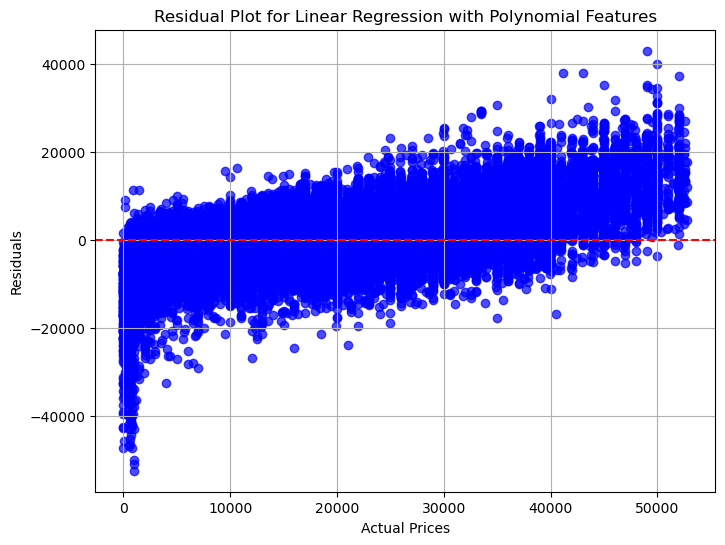

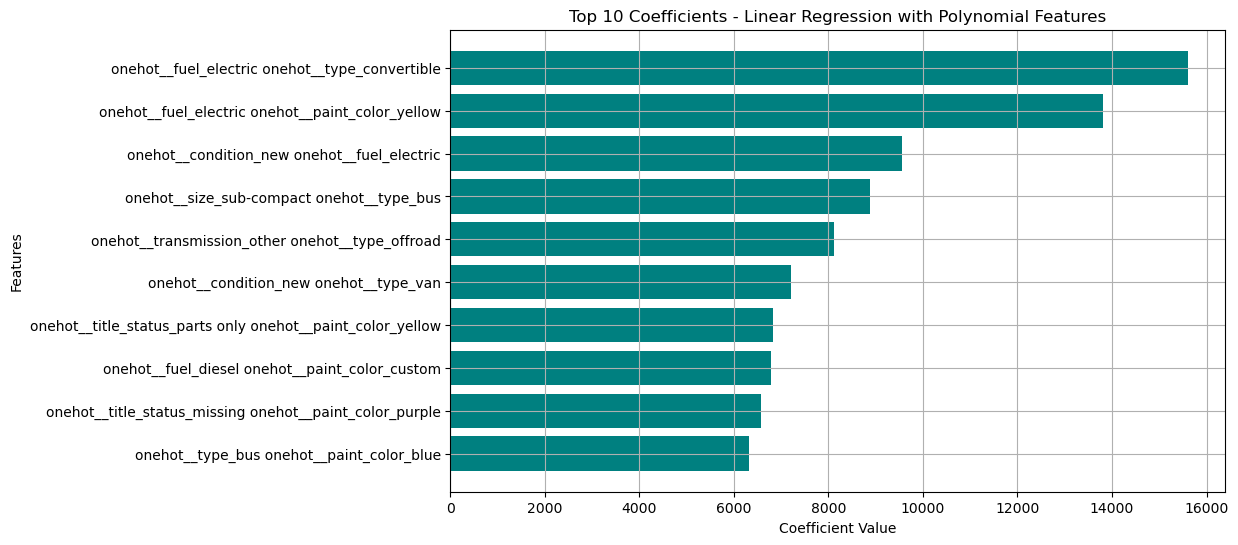

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.41046e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression with Polynomial Features Results:
The value of RMSE is 6448.94
The value of R2 score is 0.72
------------------------------


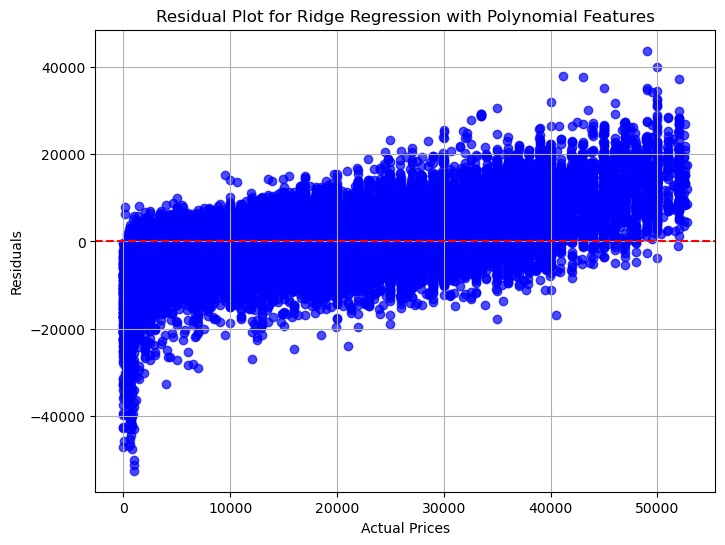

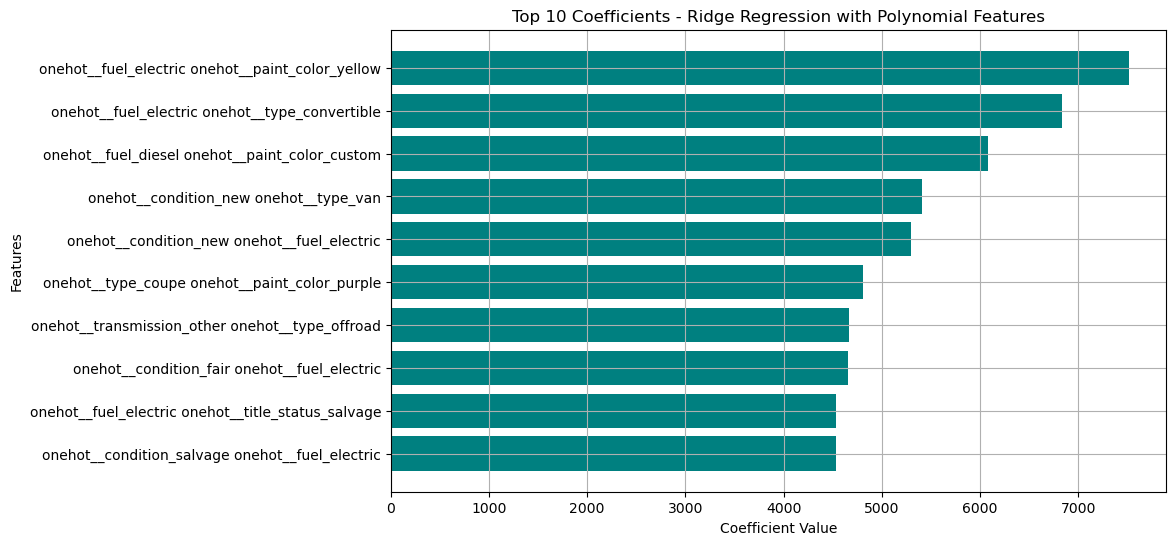

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.910e+12, tolerance: 2.716e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression with Polynomial Features Results:
The value of RMSE is 6446.48
The value of R2 score is 0.72
------------------------------


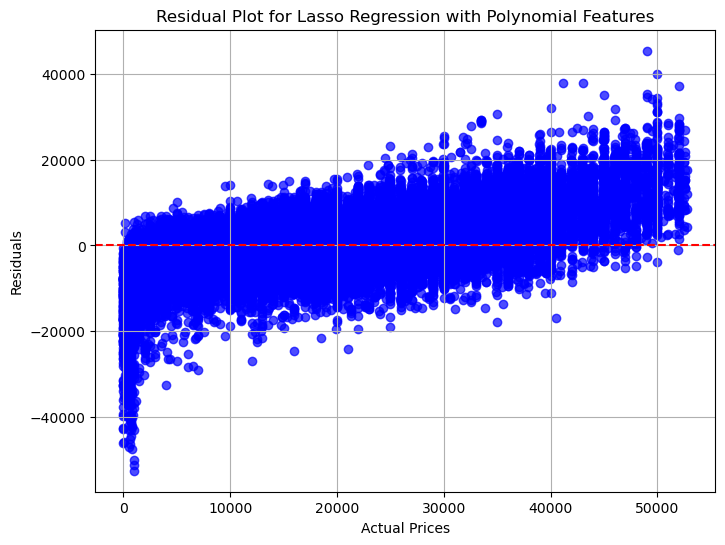

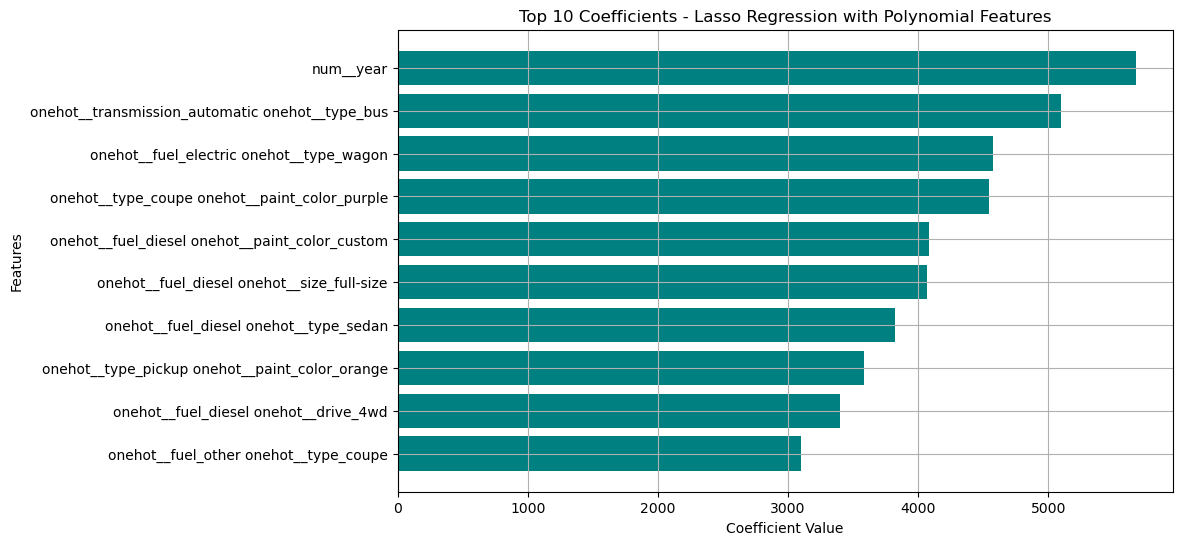

In [210]:
# Preprocessing Pipelines
numerical_columns = ['year', 'odometer', 'cylinders_numeric']
ordinal_columns = ['manufacturer', 'model', 'state']
onehot_columns = ['condition', 'transmission', 'fuel', 'title_status', 'drive', 'size', 'type', 'paint_color']

# Numerical Pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ordinal Pipeline
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# OneHot Pipeline
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combined Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('onehot', onehot_pipeline, onehot_columns)
])

# Add Polynomial Features
poly_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Add Polynomial Features
])

# Function to Train, Evaluate, and Plot Residuals and Coefficients
def train_and_evaluate_model(model, X, y, model_name):
    # Full pipeline: Preprocessing + Polynomial Features -> Model
    pipeline = Pipeline(steps=[
        ('poly_features', poly_pipeline),
        ('regressor', model)
    ])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluation Metrics
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Results:")
    print("The value of RMSE is {:.2f}".format(rmse))
    print("The value of R2 score is {:.2f}".format(r2))
    print("-" * 30)
    
    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, residuals, alpha=0.7, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Residual Plot for {model_name}")
    plt.xlabel("Actual Prices")
    plt.ylabel("Residuals")
    plt.grid()
    plt.show()
    
    # Coefficient Plot
    if hasattr(model, 'coef_'):
        poly_features = pipeline.named_steps['poly_features'].named_steps['poly'].get_feature_names_out()
        coefficients = model.coef_
        coeff_df = pd.DataFrame({'Feature': poly_features, 'Coefficient': coefficients})
        coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False).head(10)
        
        # Plot Top 10 Coefficients
        plt.figure(figsize=(10, 6))
        plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='teal')
        plt.title(f"Top 10 Coefficients - {model_name}")
        plt.xlabel("Coefficient Value")
        plt.ylabel("Features")
        plt.gca().invert_yaxis()
        plt.grid()
        plt.show()

# Load Features and Target
X = df_iqr.drop(columns=['price'])
y = df_iqr['price']

# Train and Evaluate Models
train_and_evaluate_model(LinearRegression(), X, y, "Linear Regression with Polynomial Features")
train_and_evaluate_model(Ridge(alpha=1.0), X, y, "Ridge Regression with Polynomial Features")
train_and_evaluate_model(Lasso(alpha=0.1), X, y, "Lasso Regression with Polynomial Features")


#### With KDE and line plots

Linear Regression with Polynomial Features Results:
The value of RMSE is 6450.57
The value of MAE is 4390.97
The value of R2 score is 0.72
------------------------------


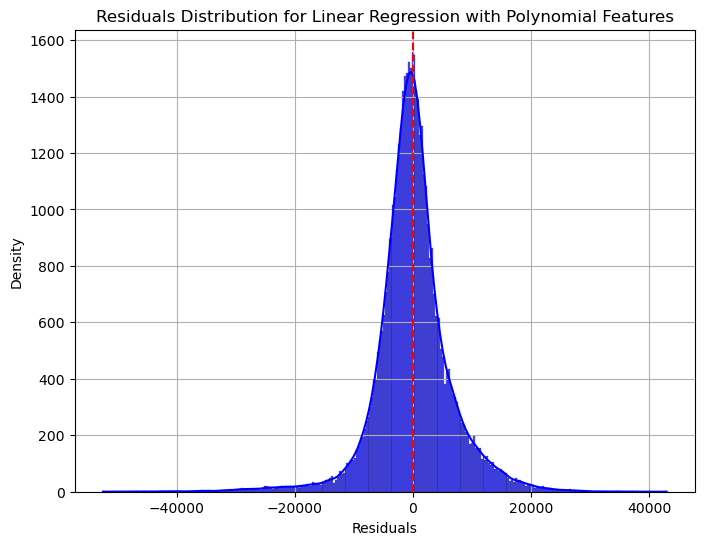

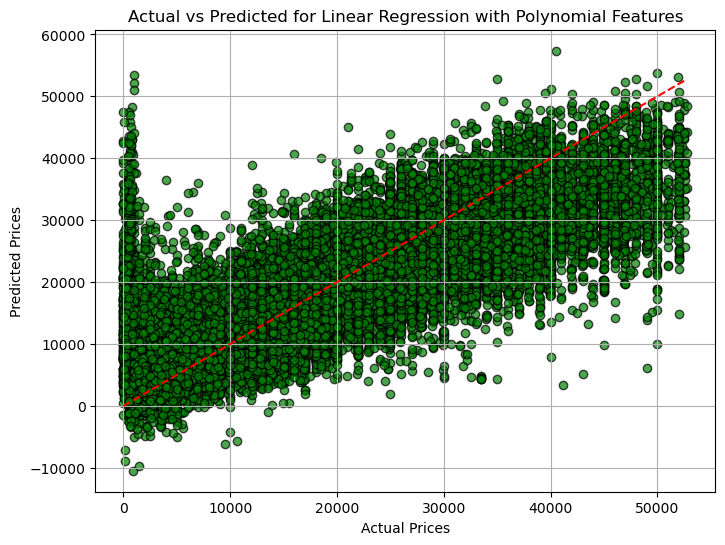

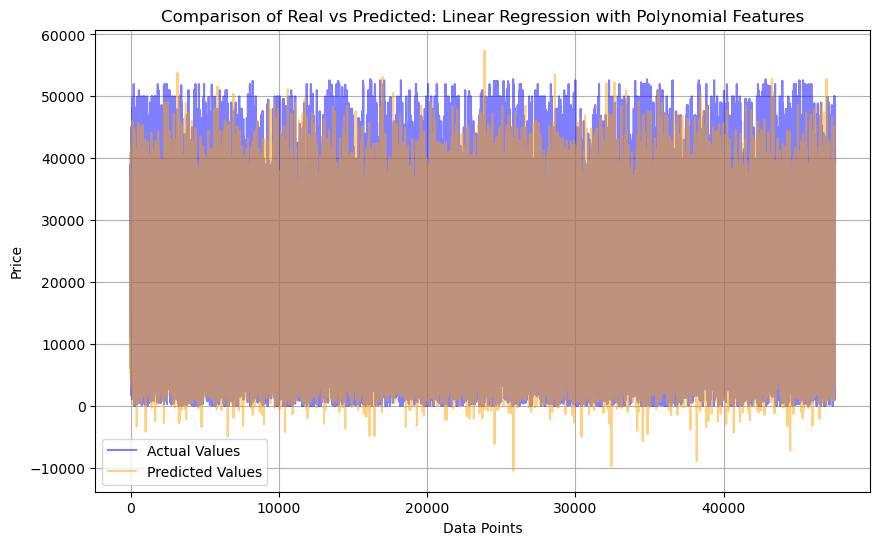

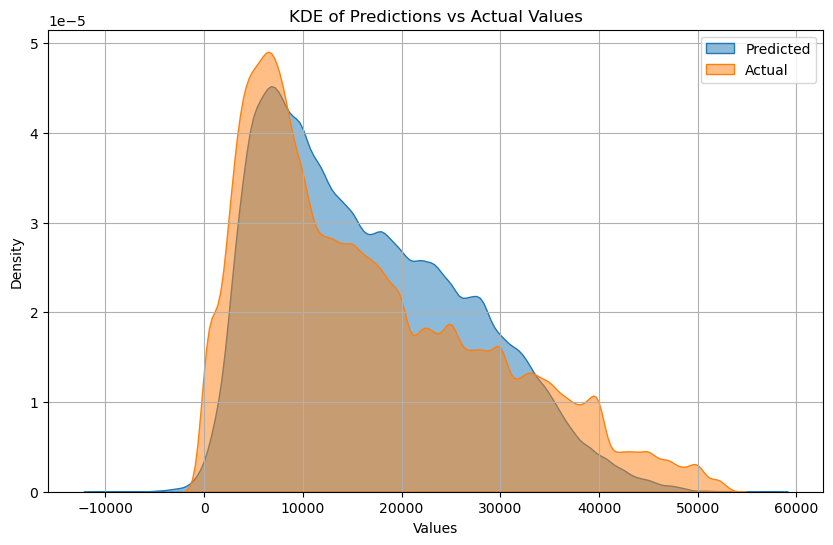

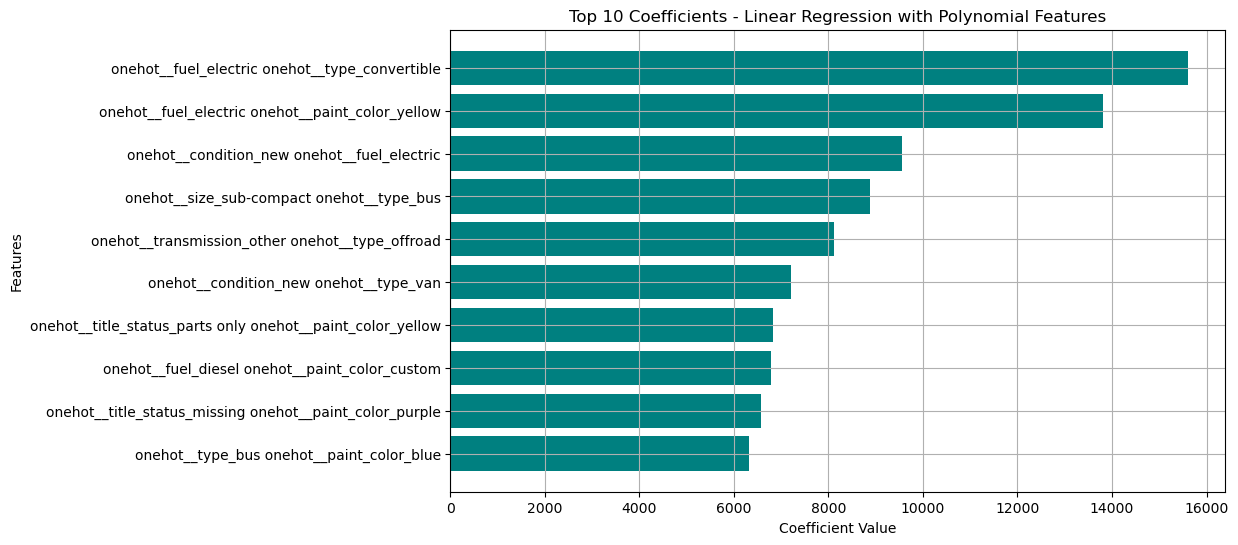

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.41046e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression with Polynomial Features Results:
The value of RMSE is 6448.94
The value of MAE is 4389.29
The value of R2 score is 0.72
------------------------------


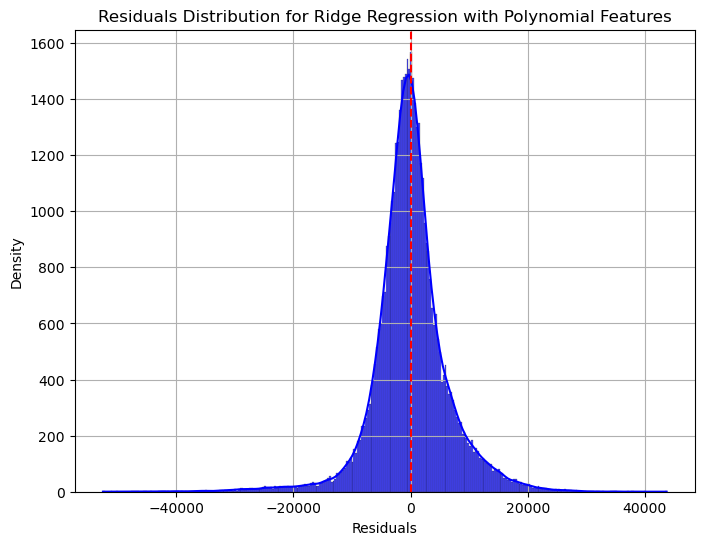

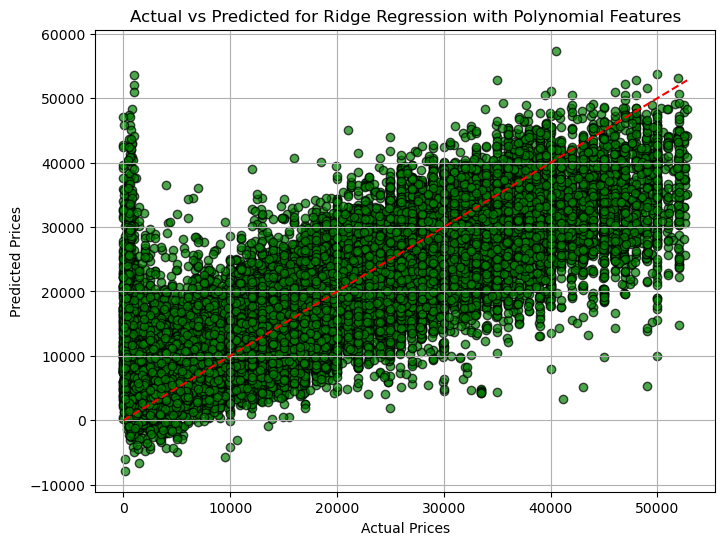

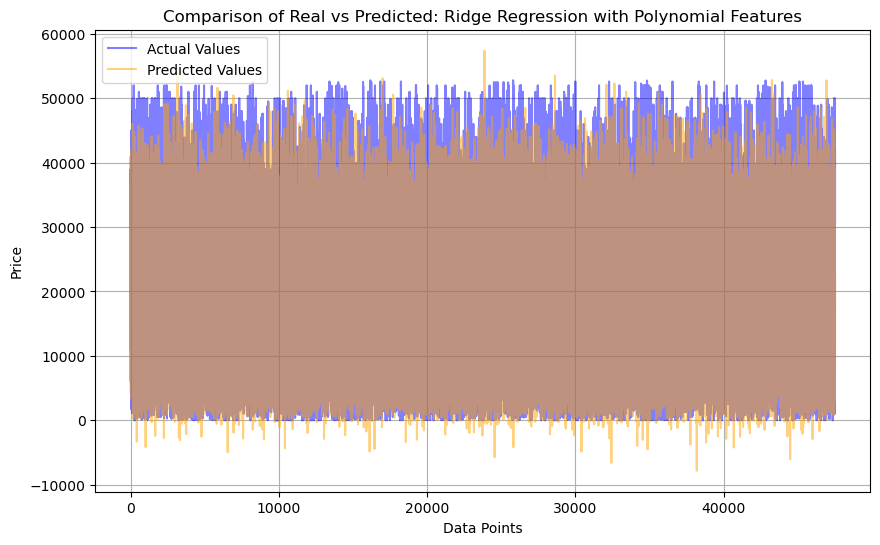

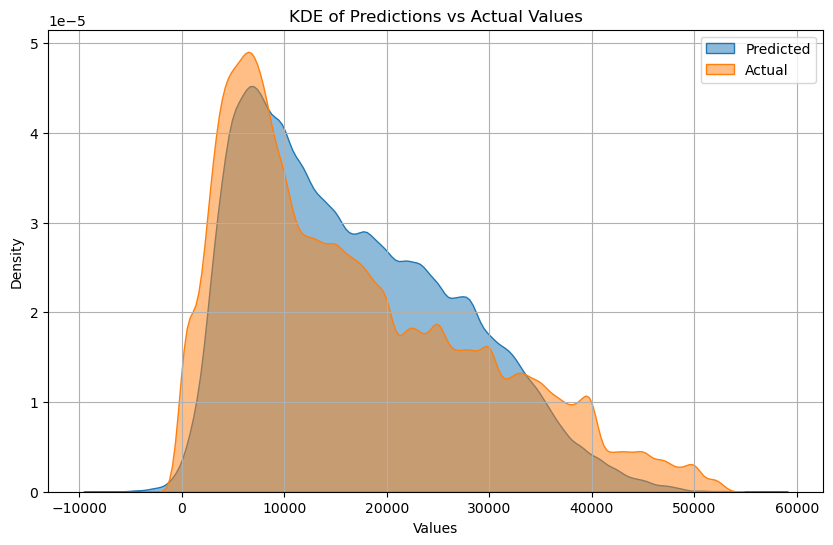

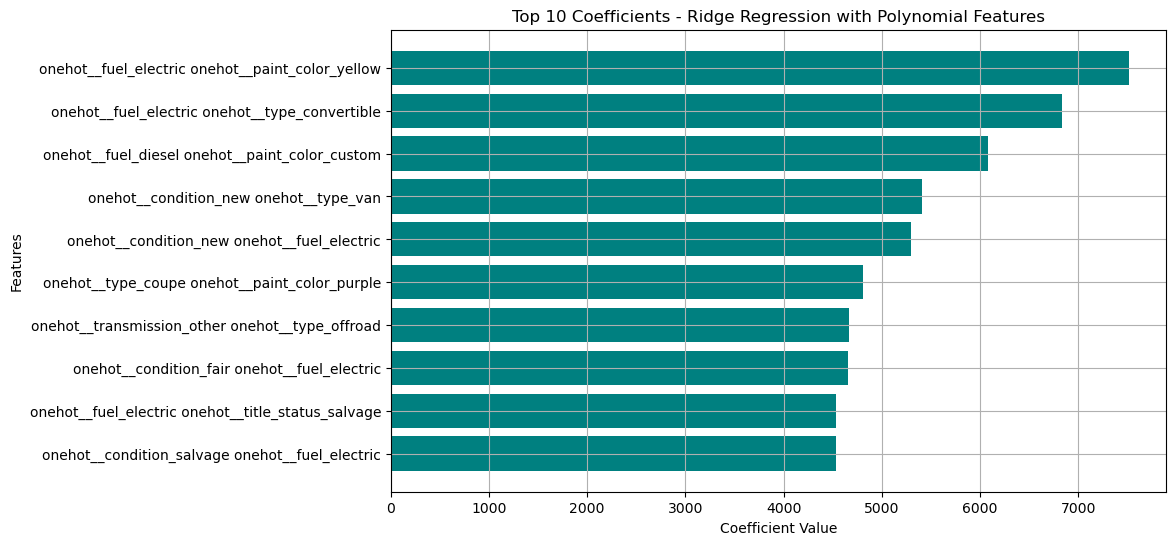

C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.911e+12, tolerance: 2.716e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression with Polynomial Features Results:
The value of RMSE is 6446.61
The value of MAE is 4385.67
The value of R2 score is 0.72
------------------------------


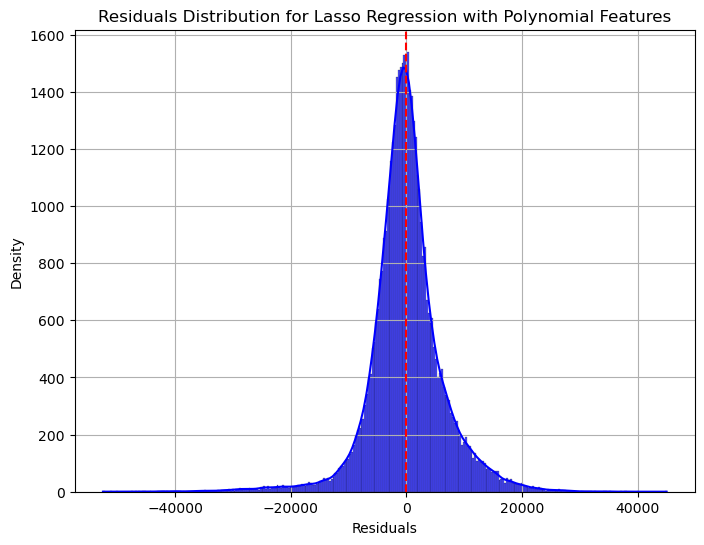

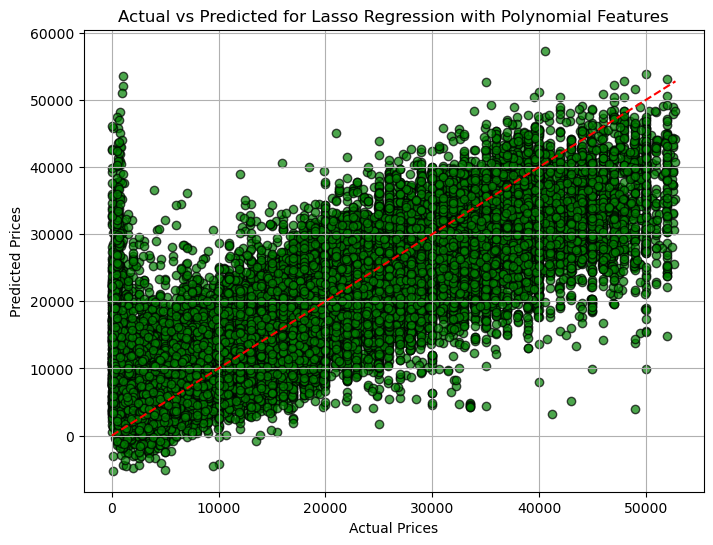

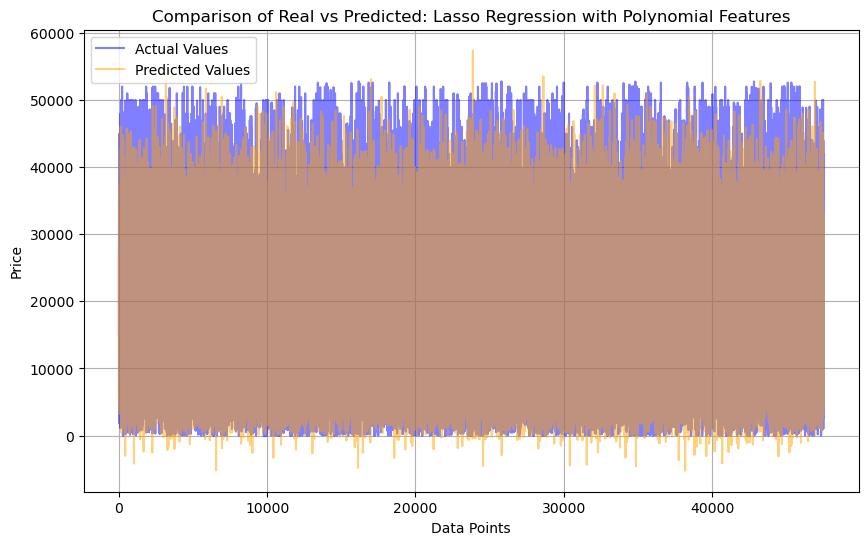

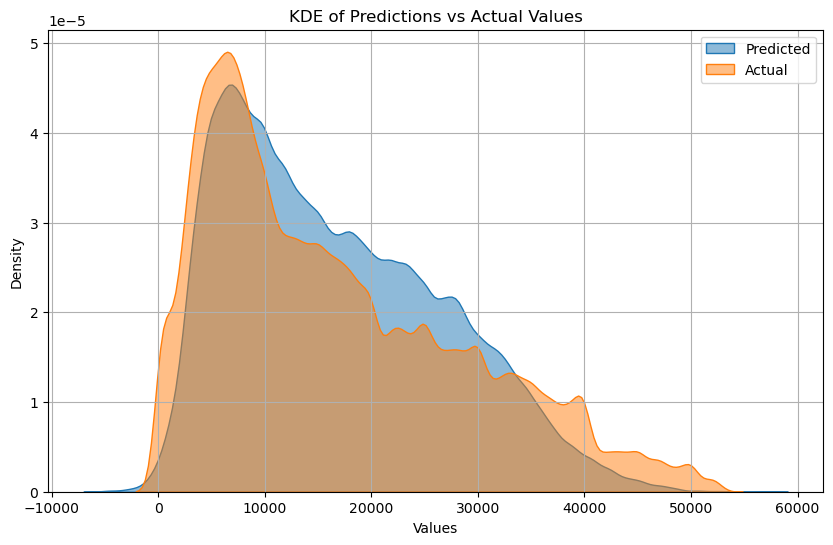

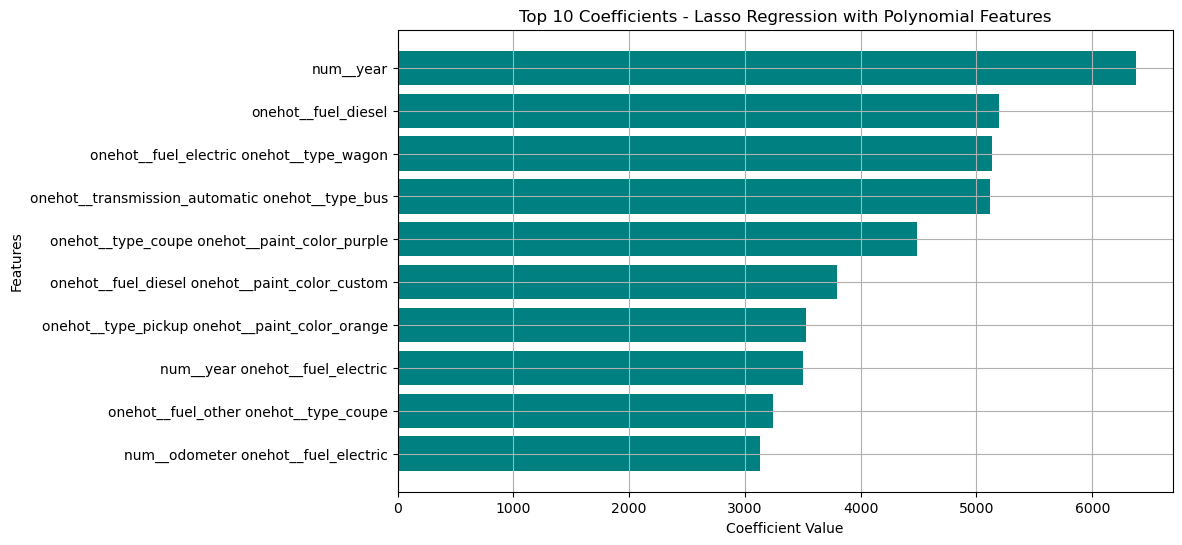

In [221]:
# Preprocessing Pipelines
numerical_columns = ['year', 'odometer', 'cylinders_numeric']
ordinal_columns = ['manufacturer', 'model', 'state']
onehot_columns = ['condition', 'transmission', 'fuel', 'title_status', 'drive', 'size', 'type', 'paint_color']

# Numerical Pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ordinal Pipeline
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# OneHot Pipeline
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combined Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('onehot', onehot_pipeline, onehot_columns)
])

# Add Polynomial Features
poly_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Add Polynomial Features
])

# Function to print evaluation metrics
def print_evaluation_metrics(y_test, y_pred, model_name):
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Results:")
    print("The value of RMSE is {:.2f}".format(rmse))
    print("The value of MAE is {:.2f}".format(mae))
    print("The value of R2 score is {:.2f}".format(r2))
    print("-" * 30)

# Function to plot residuals with KDE
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='blue', alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='--')
    plt.title(f"Residuals Distribution for {model_name}")
    plt.xlabel("Residuals")
    plt.ylabel("Density")
    plt.grid()
    plt.show()

# Function to plot actual vs predicted scatter
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='green', edgecolors='black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f"Actual vs Predicted for {model_name}")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.grid()
    plt.show()

# Function to plot lineplot of actual vs predicted values
def plot_lineplot(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    x = range(len(y_test))  # Index for sorting and visualization
    sns.lineplot(x=x, y=y_test.sort_index(), label="Actual Values", alpha=0.5, color="blue")
    sns.lineplot(x=x, y=pd.Series(y_pred).sort_index(), label="Predicted Values", alpha=0.5, color="orange")
    plt.title(f"Comparison of Real vs Predicted: {model_name}")
    plt.xlabel("Data Points")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot KDE of actual vs predicted
def plot_kde(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_pred, label='Predicted', fill=True, alpha=0.5, bw_adjust=0.5)
    sns.kdeplot(y_test, label='Actual', fill=True, alpha=0.5, bw_adjust=0.5)
    plt.title("KDE of Predictions vs Actual Values")
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot top 10 coefficients (for linear models)
def plot_coefficients(model, pipeline, model_name):
    if hasattr(model, 'coef_') and model.coef_ is not None:
        poly_features = pipeline.named_steps['poly_features'].named_steps['poly'].get_feature_names_out()
        coefficients = model.coef_
        coeff_df = pd.DataFrame({'Feature': poly_features, 'Coefficient': coefficients})
        coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False).head(10)
        
        # Plot Top 10 Coefficients
        plt.figure(figsize=(10, 6))
        plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='teal')
        plt.title(f"Top 10 Coefficients - {model_name}")
        plt.xlabel("Coefficient Value")
        plt.ylabel("Features")
        plt.gca().invert_yaxis()
        plt.grid()
        plt.show()

# Main function to train and evaluate the model
def train_and_evaluate_model(model, X, y, model_name):
    # Full pipeline
    pipeline = Pipeline(steps=[
        ('poly_features', poly_pipeline),
        ('regressor', model)
    ])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluation Metrics
    print_evaluation_metrics(y_test, y_pred, model_name)
    
    # Residual Plot
    plot_residuals(y_test, y_pred, model_name)
    
    # Actual vs Predicted Scatter Plot
    plot_actual_vs_predicted(y_test, y_pred, model_name)
    
    # Lineplot of Actual vs Predicted
    plot_lineplot(y_test, y_pred, model_name)
    
    # KDE Plot for Actual vs Predicted
    plot_kde(y_test, y_pred)
    
    # Top 10 Coefficients
    plot_coefficients(model, pipeline, model_name)
    
# Load Features and Target
X = df_iqr.drop(columns=['price'])
y = df_iqr['price']

# Train and Evaluate Models
train_and_evaluate_model(LinearRegression(), X, y, "Linear Regression with Polynomial Features")
train_and_evaluate_model(Ridge(alpha=1.0), X, y, "Ridge Regression with Polynomial Features")
train_and_evaluate_model(Lasso(alpha=0.1), X, y, "Lasso Regression with Polynomial Features")


## With Cross-Validation and Optimal Alpha for Ridge and Lasso

Grid Search for Ridge Regression:
Running Grid Search for Ridge Regression...
Best Alpha for Ridge Regression: 100.0


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression Results:
MSE: 6461.58
R² Score: 0.71
------------------------------


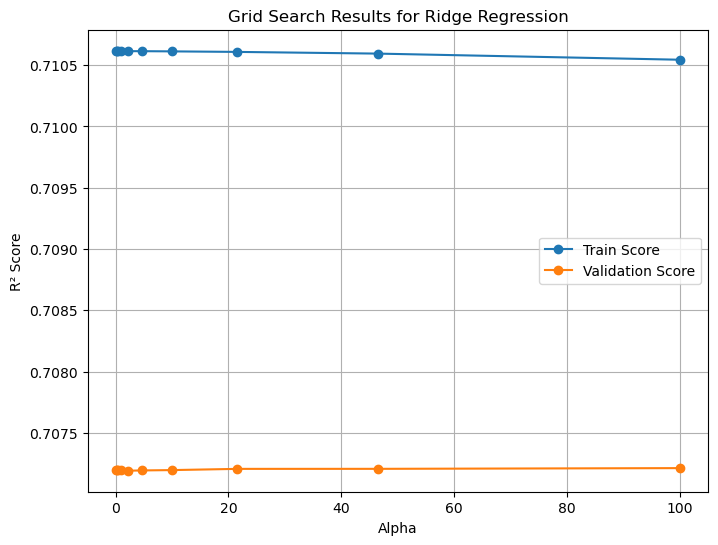

Grid Search for Lasso Regression:
Running Grid Search for Lasso Regression...
Best Alpha for Lasso Regression: 0.46415888336127786


C:\Users\shikh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso Regression Results:
MSE: 6461.00
R² Score: 0.71
------------------------------


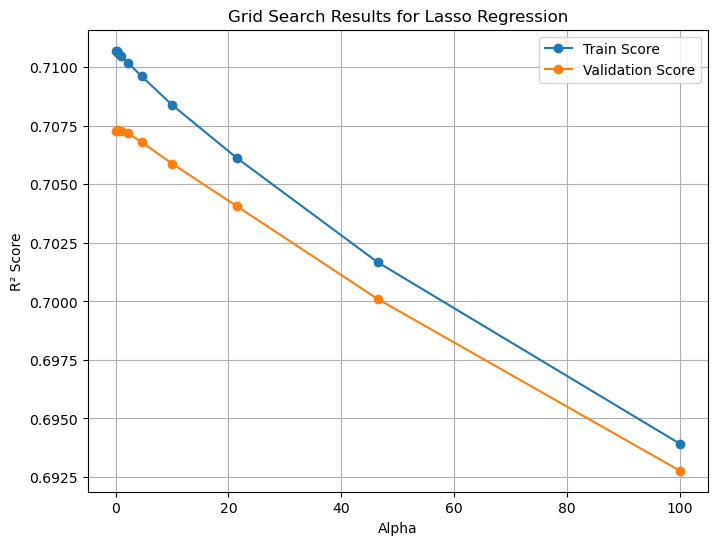

In [257]:
# Suppress Warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Separate Features and Target
X = df_iqr.drop(columns=['price'])  # Features
y = df_iqr['price']                 # Target

# Identify Columns
numerical_columns = ['year', 'odometer', 'cylinders_numeric']
ordinal_columns = ['manufacturer', 'model', 'state']
onehot_columns = ['condition', 'transmission', 'fuel', 'title_status', 'drive', 'size', 'type', 'paint_color']

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        
        ('ord', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), ordinal_columns),
        
        ('onehot', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensures dense output
        ]), onehot_columns)
    ],
    remainder='drop'  # Drop untransformed columns
)

# Polynomial Pipeline with Scaling and Variance Threshold
poly_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Degree 2 Polynomial Features
    ('variance', VarianceThreshold(threshold=0.01)),             # Drop low-variance features
    ('scaler', StandardScaler())                                 # Final Scaling
])

# Function to Perform Grid Search with Cross-Validation
def grid_search_with_cv(model, param_grid, X, y, model_name):
    pipeline = Pipeline([
        ('poly_features', poly_pipeline),
        ('regressor', model)
    ])
    
    # Grid Search with Cross-Validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', return_train_score=True, error_score='raise')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Running Grid Search for {model_name}...")
    grid_search.fit(X_train, y_train)
    
    # Best Model and Alpha
    best_alpha = grid_search.best_params_['regressor__alpha']
    print(f"Best Alpha for {model_name}: {best_alpha}")
    
    # Evaluate Best Model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Results:")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)
    
    # Plot CV Results
    results = grid_search.cv_results_
    plt.figure(figsize=(8, 6))
    plt.plot(param_grid['regressor__alpha'], results['mean_train_score'], label='Train Score', marker='o')
    plt.plot(param_grid['regressor__alpha'], results['mean_test_score'], label='Validation Score', marker='o')
    plt.xlabel('Alpha')
    plt.ylabel('R² Score')
    plt.title(f'Grid Search Results for {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Define Alpha Grid (Avoid small alphas to stabilize)
alpha_grid = {'regressor__alpha': np.logspace(-1, 2, 10)}  # Alpha values: 0.1 to 100

# Perform Grid Search with CV for Ridge and Lasso
print("Grid Search for Ridge Regression:")
grid_search_with_cv(Ridge(solver='lsqr'), alpha_grid, X, y, "Ridge Regression")

print("Grid Search for Lasso Regression:")
grid_search_with_cv(Lasso(max_iter=10000), alpha_grid, X, y, "Lasso Regression")